##### **메서드 설치 및 불러오기**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 메서드 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

# Box-Cox
from sklearn.preprocessing import PowerTransformer

# AutoML
from pycaret.classification import *

# Sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import f1_score, confusion_matrix

In [ ]:
plt.rc('font', family='NanumBarunGothic')

##### **데이터 보기**

In [ ]:
# 코랩 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ROOT = '/content/drive/MyDrive/2022빅콘/data/'

In [ ]:
# 데이터 불러오기
df = pd.read_csv(ROOT + 'real_real_final.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', '신청서 번호', '한도조회 일시', '금융사 번호', '상품 번호', '승인한도', '승인금리',
       '신청 여부(타겟)', '유저 번호', '생성일시', '근로형태', '고용형태', '주거소유형태', '대출목적', '날짜',
       '연령', '연령대', '신용등급', '개인회생 종류', '연소득', '대출희망금액', '기대출수', '기대출금액',
       '근속월수', '상품 누적 추천 수', '추천 수', '신용점수(보완)', '조회 횟수', '시간차'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df['금융사 번호'] = df['금융사 번호'].astype('str')
df['상품 번호'] = df['상품 번호'].astype('str')

In [ ]:
df.corr()

,신청서 번호,승인한도,승인금리,신청 여부(타겟),유저 번호,연소득,대출희망금액,기대출수,기대출금액,근속월수,상품 누적 추천 수,추천 수,신용점수(보완),조회 횟수,시간차
신청서 번호,1.000000,-0.000101,0.000108,0.000438,-0.001701,0.001042,0.001394,0.000697,0.001089,0.000854,-0.000209,-0.000544,-0.000709,-0.000727,0.000642
승인한도,-0.000101,1.000000,-0.017229,-0.029387,0.000749,0.022731,0.015317,-0.033113,-0.008179,0.029887,-0.008762,0.088463,0.075146,-0.014766,-0.002810
승인금리,0.000108,-0.017229,1.000000,-0.052392,-0.001444,-0.007296,-0.031584,0.102501,-0.014495,-0.043200,0.019837,-0.244367,-0.231486,0.034274,0.016439
신청 여부(타겟),0.000438,-0.029387,-0.052392,1.000000,0.000233,-0.006072,-0.026871,0.078333,-0.008079,-0.034043,-0.019007,-0.233290,-0.168648,0.000217,-0.003300
유저 번호,-0.001701,0.000749,-0.001444,0.000233,1.000000,0.007388,0.004741,-0.004098,0.001766,0.002116,0.005576,0.005095,0.007458,0.004837,0.000002
연소득,0.001042,0.022731,-0.007296,-0.006072,0.007388,1.000000,0.111785,0.003245,0.081982,0.111013,-0.003026,0.015691,0.052186,0.000769,-0.006944
대출희망금액,0.001394,0.015317,-0.031584,-0.026871,0.004741,0.111785,1.000000,-0.038821,0.037685,0.047382,-0.013746,0.066172,0.089088,-0.019004,-0.016648
기대출수,0.000697,-0.033113,0.102501,0.078333,-0.004098,0.003245,-0.038821,1.000000,0.412209,0.128015,0.076034,-0.256398,-0.216020,0.097276,0.050447
기대출금액,0.001089,-0.008179,-0.014495,-0.008079,0.001766,0.081982,0.037685,0.412209,1.000000,0.277159,0.034890,-0.076556,0.093967,0.036789,0.033708
근속월수,0.000854,0.029887,-0.043200,-0.034043,0.002116,0.111013,0.047382,0.128015,0.277159,1.000000,-0.017811,0.104254,0.154739,-0.030220,0.003796


In [ ]:
df_one = df[df['유저 번호'].duplicated() == False]
df_one.corr()

,신청서 번호,승인한도,승인금리,신청 여부(타겟),유저 번호,연소득,대출희망금액,기대출수,기대출금액,근속월수,상품 누적 추천 수,추천 수,신용점수(보완),조회 횟수,시간차
신청서 번호,1.000000,0.000894,0.000077,0.000925,-0.003183,0.000915,-0.000690,-0.001320,0.000461,-0.000105,-0.001030,-0.001582,-0.002643,0.001766,-0.001756
승인한도,0.000894,1.000000,-0.077811,-0.041861,0.003122,0.049091,0.035003,-0.062714,-0.013225,0.057248,-0.013221,0.212092,0.155155,-0.019862,-0.010970
승인금리,0.000077,-0.077811,1.000000,0.058302,-0.003147,-0.008367,-0.038248,0.121530,-0.019954,-0.035597,0.015341,-0.311642,-0.231406,0.021706,0.024486
신청 여부(타겟),0.000925,-0.041861,0.058302,1.000000,0.000777,-0.018779,-0.052228,0.112677,-0.034009,-0.064533,-0.023793,-0.349983,-0.283141,-0.001824,0.011059
유저 번호,-0.003183,0.003122,-0.003147,0.000777,1.000000,0.001656,-0.000524,-0.000868,0.000665,0.000895,0.001942,0.004815,0.001664,0.001081,0.001804
연소득,0.000915,0.049091,-0.008367,-0.018779,0.001656,1.000000,0.134577,0.005363,0.069995,0.101885,-0.005288,0.032861,0.049414,-0.002880,-0.006503
대출희망금액,-0.000690,0.035003,-0.038248,-0.052228,-0.000524,0.134577,1.000000,-0.034208,0.042908,0.042652,-0.021610,0.089270,0.104726,-0.024087,-0.018955
기대출수,-0.001320,-0.062714,0.121530,0.112677,-0.000868,0.005363,-0.034208,1.000000,0.412306,0.129961,0.092820,-0.201515,-0.257995,0.114219,0.089723
기대출금액,0.000461,-0.013225,-0.019954,-0.034009,0.000665,0.069995,0.042908,0.412306,1.000000,0.272412,0.046412,0.004353,0.065695,0.047823,0.050708
근속월수,-0.000105,0.057248,-0.035597,-0.064533,0.000895,0.101885,0.042652,0.129961,0.272412,1.000000,0.000278,0.146139,0.118961,-0.007537,0.009871


##### **기대출수, 기대출금액**

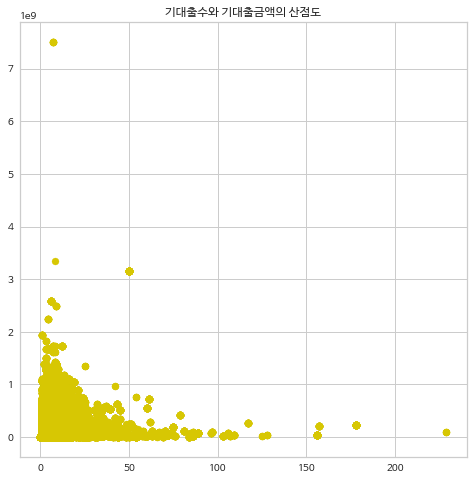

In [ ]:
plt.figure(figsize=(8,8))
plt.title('기대출수와 기대출금액의 산점도')
plt.scatter(df['기대출수'], df['기대출금액'], c='y')
plt.show()

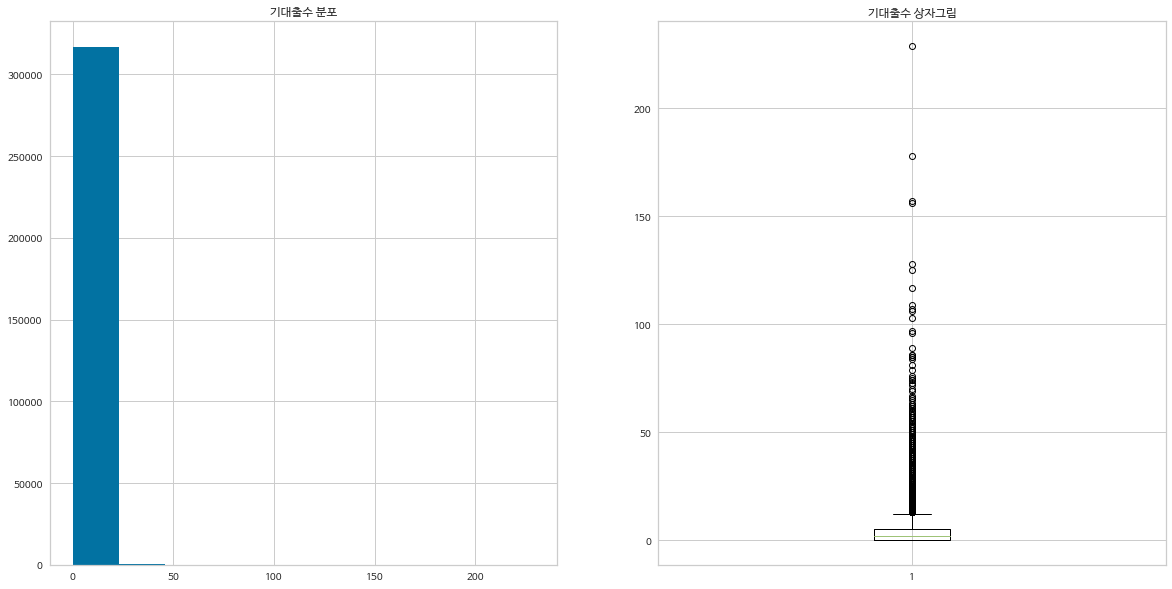

로그 변환 전 왜도 값 : 5.036486988861912
로그 변환 전 첨도 값 : 125.19157997105381


In [ ]:
# 기대출수
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('기대출수 분포')
plt.hist(df[df['유저 번호'].duplicated() == False]['기대출수'])

plt.subplot(1,2,2)
plt.title('기대출수 상자그림')
plt.boxplot(df[df['유저 번호'].duplicated() == False]['기대출수'])

plt.show()

print('로그 변환 전 왜도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['기대출수'].skew()))
print('로그 변환 전 첨도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['기대출수'].kurt()))

In [ ]:
df['기대출수'].describe()['std']

3.1594086118149822

In [ ]:
df['기대출금액'].describe()['std']

89693341.44902205

**로그 변환 시도**

In [ ]:
# 로그 변환 후
df['기대출수(로그)'] = np.log1p(df['기대출수'])
df['기대출금액(로그)'] = np.log1p(df['기대출금액'])

In [ ]:
# 둘다 로그 변환하면 상관관계 높아짐
df[df['유저 번호'].duplicated() == False][['기대출수(로그)','기대출금액(로그)','신청 여부(타겟)']].corr()

,기대출수(로그),기대출금액(로그),신청 여부(타겟)
기대출수(로그),1.000000,0.830878,0.108363
기대출금액(로그),0.830878,1.000000,0.056275
신청 여부(타겟),0.108363,0.056275,1.000000


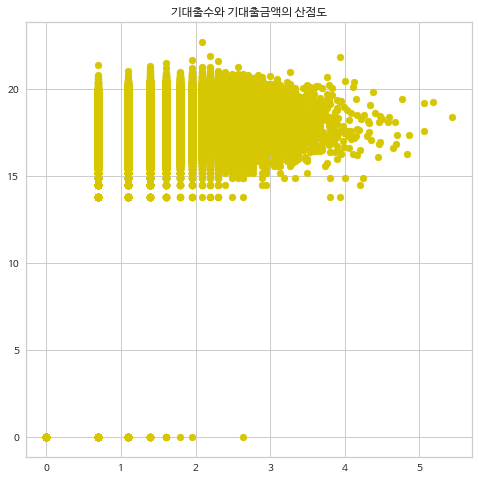

In [ ]:
plt.figure(figsize=(8,8))
plt.title('기대출수와 기대출금액의 산점도')
plt.scatter(df[df['유저 번호'].duplicated() == False]['기대출수(로그)'], df[df['유저 번호'].duplicated() == False]['기대출금액(로그)'], c='y')
plt.show()

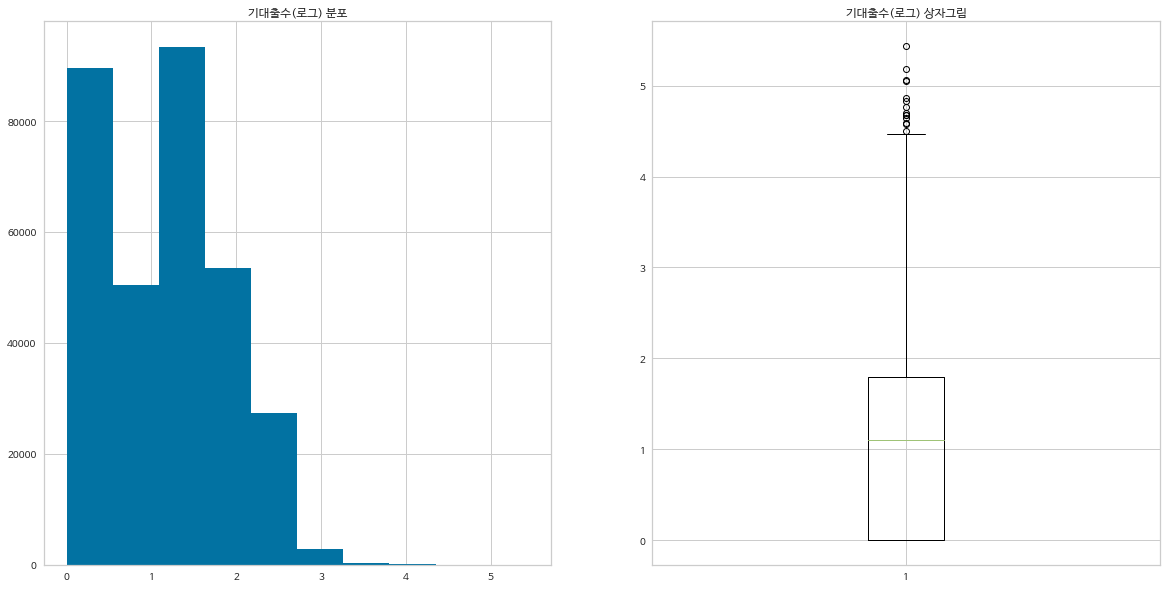

로그 변환 후 왜도 값 : 0.09777526231111214
로그 변환 후 첨도 값 : -1.069292343392057


In [ ]:
# 기대출수
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('기대출수(로그) 분포')
plt.hist(df[df['유저 번호'].duplicated() == False]['기대출수(로그)'])

plt.subplot(1,2,2)
plt.title('기대출수(로그) 상자그림')
plt.boxplot(df[df['유저 번호'].duplicated() == False]['기대출수(로그)'])

plt.show()

print('로그 변환 후 왜도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['기대출수(로그)'].skew()))
print('로그 변환 후 첨도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['기대출수(로그)'].kurt()))

**기대출금액(로그) 칼럼 버린다**

In [ ]:
df.drop(['기대출금액(로그)'], axis=1, inplace=True)

**Box-Cox 변환 시도는 불가, 기대출수 0을 다른 숫자로 바꿀 수 없음**

##### **승인한도**

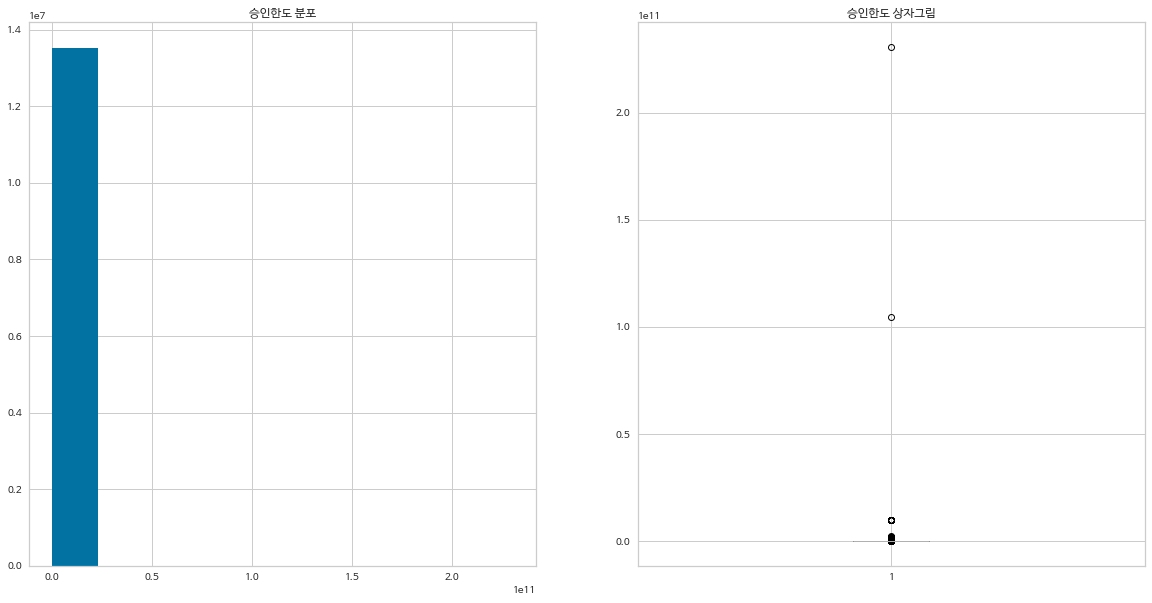

로그 변환 전 왜도 값 : 2642.1336257055077
로그 변환 전 첨도 값 : 8039379.872182141


In [ ]:
# 승인한도
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('승인한도 분포')
plt.hist(df['승인한도'])

plt.subplot(1,2,2)
plt.title('승인한도 상자그림')
plt.boxplot(df['승인한도'])

plt.show()

print('로그 변환 전 왜도 값 : {}'.format(df['승인한도'].skew()))
print('로그 변환 전 첨도 값 : {}'.format(df['승인한도'].kurt()))

**로그 변환**

In [ ]:
# 승인한도 로그 변환 후
df['승인한도(로그)'] = np.log1p(df['승인한도'])

In [ ]:
df['승인한도'].describe()['std']

72219067.83059108

In [ ]:
df['승인한도(로그)'].describe()['std']

1.0284170425756667

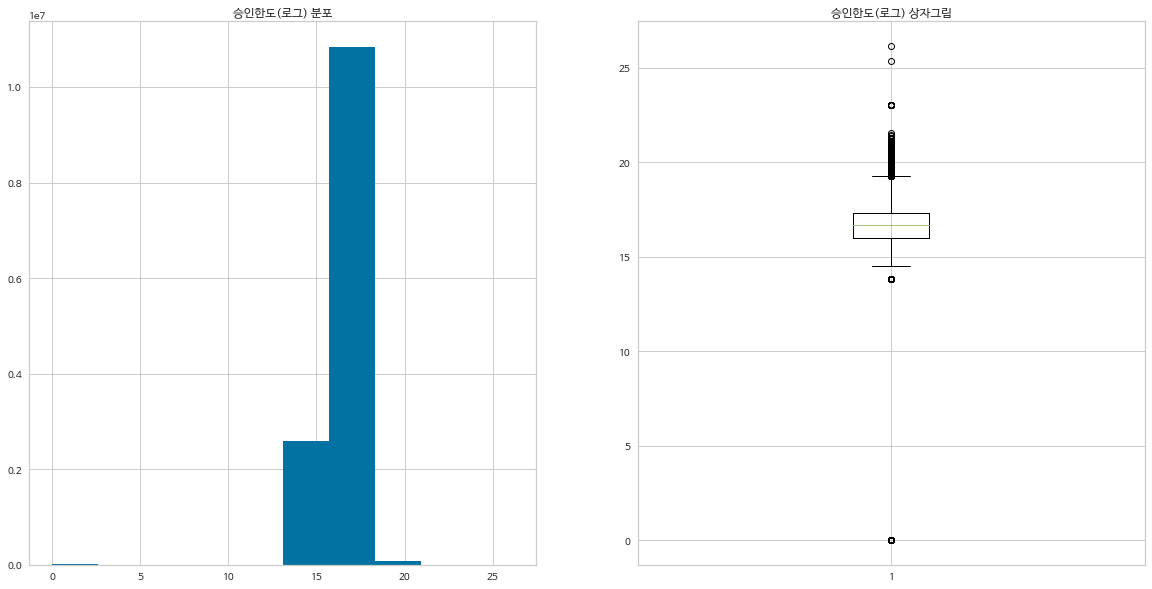

로그 변환 후 왜도 값 : -2.603653671342527
로그 변환 후 첨도 값 : 33.85533112830144


In [ ]:
# 승인한도
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('승인한도(로그) 분포')
plt.hist(df['승인한도(로그)'])

plt.subplot(1,2,2)
plt.title('승인한도(로그) 상자그림')
plt.boxplot(df['승인한도(로그)'])

plt.show()

print('로그 변환 후 왜도 값 : {}'.format(df['승인한도(로그)'].skew()))
print('로그 변환 후 첨도 값 : {}'.format(df['승인한도(로그)'].kurt()))

**Box-Cox 진행**

In [ ]:
PTB = PowerTransformer(method='box-cox')

df['승인한도(boxcox)'] = df['승인한도']

df.loc[df['승인한도'] == 0, '승인한도(boxcox)'] = 1

df['승인한도(boxcox)'] = PTB.fit_transform(df[['승인한도(boxcox)']])

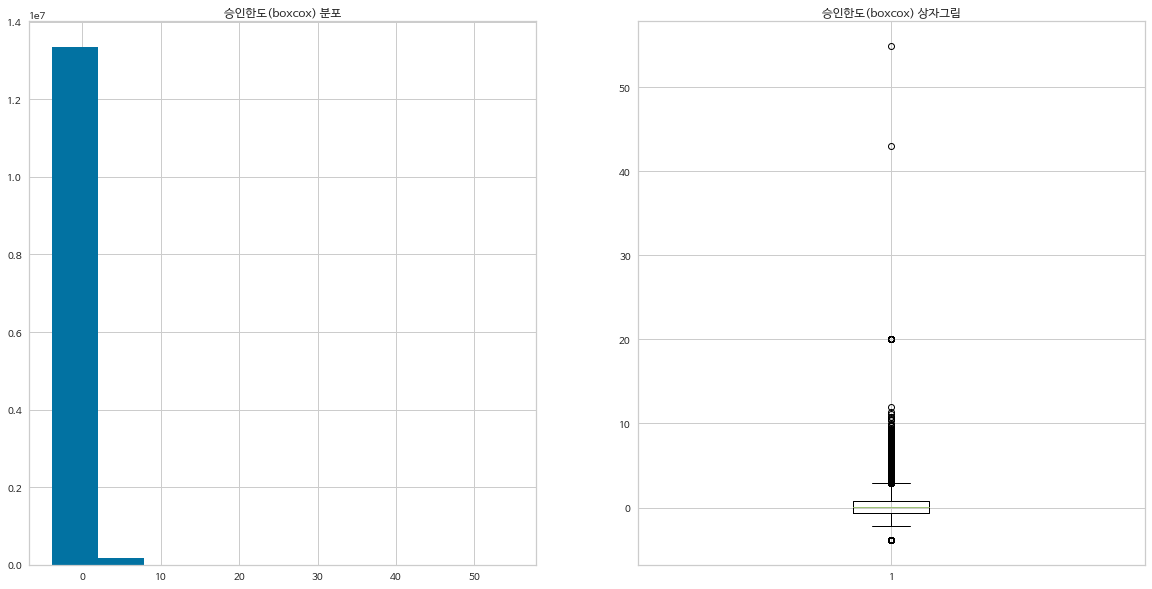

BoxCox 변환 후 왜도 값 : -0.03744849074862724
BoxCox 변환 후 첨도 값 : 0.6096375948100747


In [ ]:
# 승인한도
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('승인한도(boxcox) 분포')
plt.hist(df['승인한도(boxcox)'])

plt.subplot(1,2,2)
plt.title('승인한도(boxcox) 상자그림')
plt.boxplot(df['승인한도(boxcox)'])

plt.show()

print('BoxCox 변환 후 왜도 값 : {}'.format(df['승인한도(boxcox)'].skew()))
print('BoxCox 변환 후 첨도 값 : {}'.format(df['승인한도(boxcox)'].kurt()))

In [ ]:
df[['승인한도','승인한도(로그)','승인한도(boxcox)','신청 여부(타겟)']].corr()

,승인한도,승인한도(로그),승인한도(boxcox),신청 여부(타겟)
승인한도,1.000000,0.212308,0.257079,-0.029387
승인한도(로그),0.212308,1.000000,0.947898,-0.018284
승인한도(boxcox),0.257079,0.947898,1.000000,-0.027785
신청 여부(타겟),-0.029387,-0.018284,-0.027785,1.000000


**BoxCox 사용**

##### **승인금리**

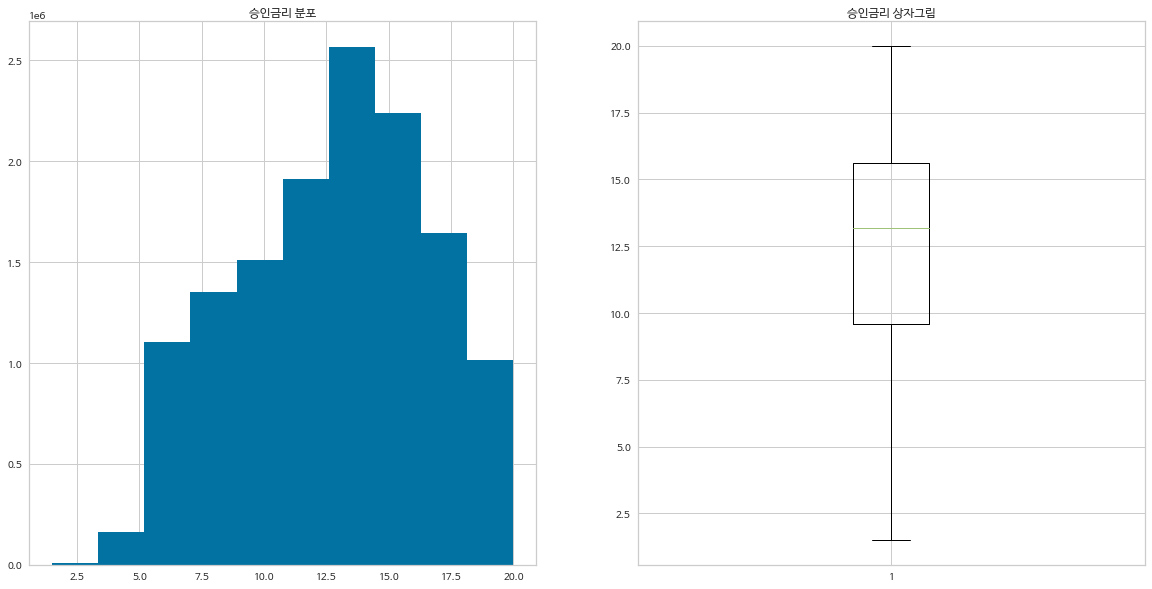

로그 변환 전 왜도 값 : -0.17230684516705527
로그 변환 전 첨도 값 : -0.8235220894330415


In [ ]:
# 승인금리
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('승인금리 분포')
plt.hist(df['승인금리'])

plt.subplot(1,2,2)
plt.title('승인금리 상자그림')
plt.boxplot(df['승인금리'])

plt.show()

print('로그 변환 전 왜도 값 : {}'.format(df['승인금리'].skew()))
print('로그 변환 전 첨도 값 : {}'.format(df['승인금리'].kurt()))

##### **상품 누적 추천 수**

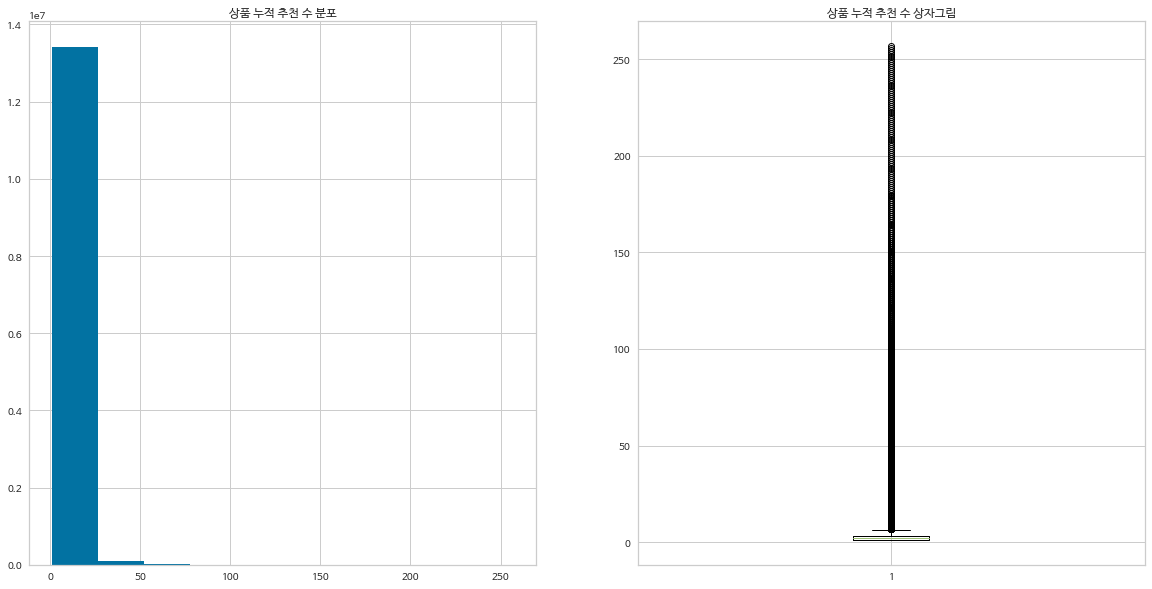

로그 변환 전 왜도 값 : 8.057387865978034
로그 변환 전 첨도 값 : 126.70618836528521


In [ ]:
# 상품 누적 추천 수
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('상품 누적 추천 수 분포')
plt.hist(df['상품 누적 추천 수'])

plt.subplot(1,2,2)
plt.title('상품 누적 추천 수 상자그림')
plt.boxplot(df['상품 누적 추천 수'])

plt.show()

print('로그 변환 전 왜도 값 : {}'.format(df['상품 누적 추천 수'].skew()))
print('로그 변환 전 첨도 값 : {}'.format(df['상품 누적 추천 수'].kurt()))

**로그 변환**

In [ ]:
# 상품 누적 추천 수 로그 변환 후
df['상품 누적 추천 수(로그)'] = np.log1p(df['상품 누적 추천 수'])

In [ ]:
df['상품 누적 추천 수'].describe()['std']

5.043318918006494

In [ ]:
df['상품 누적 추천 수(로그)'].describe()['std']

0.6087219667304296

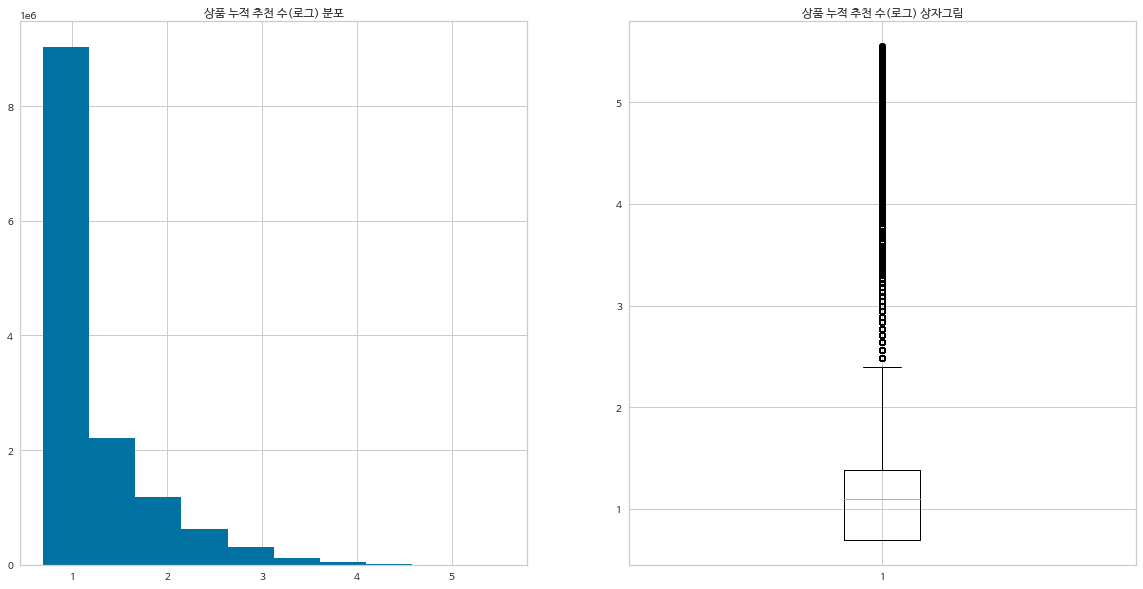

로그 변환 후 왜도 값 : 1.5621180668504737
로그 변환 후 첨도 값 : 2.608612110657855


In [ ]:
# 상품 누적 추천 수
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('상품 누적 추천 수(로그) 분포')
plt.hist(df['상품 누적 추천 수(로그)'])

plt.subplot(1,2,2)
plt.title('상품 누적 추천 수(로그) 상자그림')
plt.boxplot(df['상품 누적 추천 수(로그)'])

plt.show()

print('로그 변환 후 왜도 값 : {}'.format(df['상품 누적 추천 수(로그)'].skew()))
print('로그 변환 후 첨도 값 : {}'.format(df['상품 누적 추천 수(로그)'].kurt()))

**Box-Cox 진행**

In [ ]:
PTB = PowerTransformer(method='box-cox')

df['상품 누적 추천 수(boxcox)'] = df['상품 누적 추천 수']

df['상품 누적 추천 수(boxcox)'] = PTB.fit_transform(df[['상품 누적 추천 수(boxcox)']])

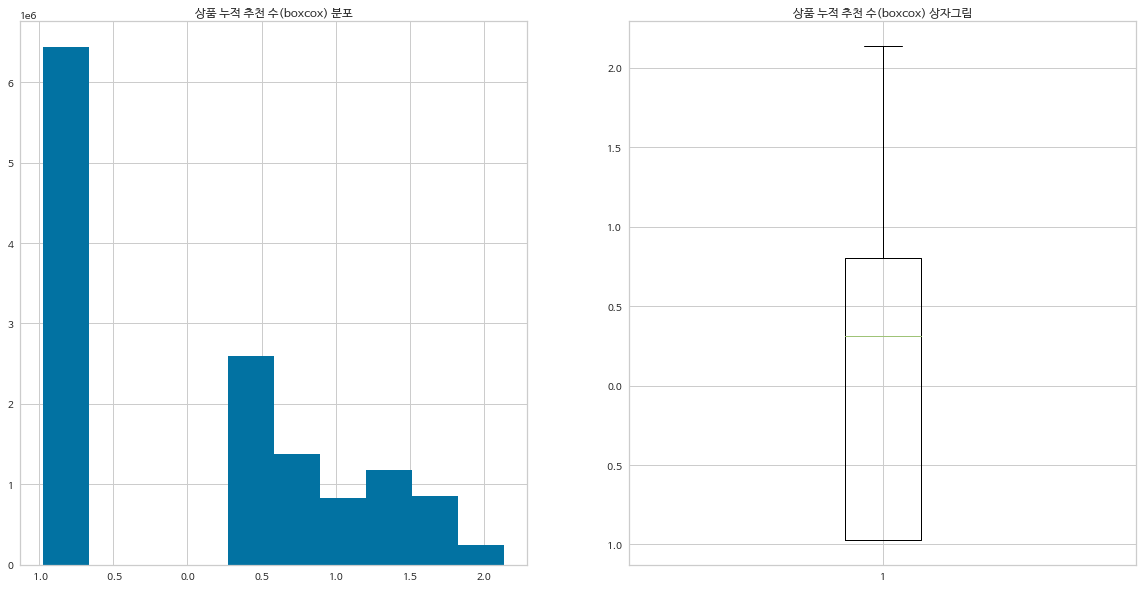

BoxCox 변환 후 왜도 값 : 0.3182235427343856
BoxCox 변환 후 첨도 값 : -1.4470923689715387


In [ ]:
# 상품 누적 추천 수
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('상품 누적 추천 수(boxcox) 분포')
plt.hist(df['상품 누적 추천 수(boxcox)'])

plt.subplot(1,2,2)
plt.title('상품 누적 추천 수(boxcox) 상자그림')
plt.boxplot(df['상품 누적 추천 수(boxcox)'])

plt.show()

print('BoxCox 변환 후 왜도 값 : {}'.format(df['상품 누적 추천 수(boxcox)'].skew()))
print('BoxCox 변환 후 첨도 값 : {}'.format(df['상품 누적 추천 수(boxcox)'].kurt()))

In [ ]:
df[['상품 누적 추천 수','상품 누적 추천 수(로그)','상품 누적 추천 수(boxcox)','신청 여부(타겟)']].corr()

,상품 누적 추천 수,상품 누적 추천 수(로그),상품 누적 추천 수(boxcox),신청 여부(타겟)
상품 누적 추천 수,1.000000,0.828762,0.607125,-0.019007
상품 누적 추천 수(로그),0.828762,1.000000,0.921380,-0.013684
상품 누적 추천 수(boxcox),0.607125,0.921380,1.000000,-0.003930
신청 여부(타겟),-0.019007,-0.013684,-0.003930,1.000000


**상품 누적 추천 수는 로그 사용**

##### **조회 횟수**

In [ ]:
df.groupby(['유저 번호'], as_index=False)['조회 횟수'].max().describe()

,유저 번호,조회 횟수
count,317458.000000,317458.000000
mean,439718.296042,3.051512
std,253926.732373,4.548573
min,9.000000,1.000000
25%,219843.250000,1.000000
50%,439971.500000,2.000000
75%,659605.500000,3.000000
max,879697.000000,280.000000


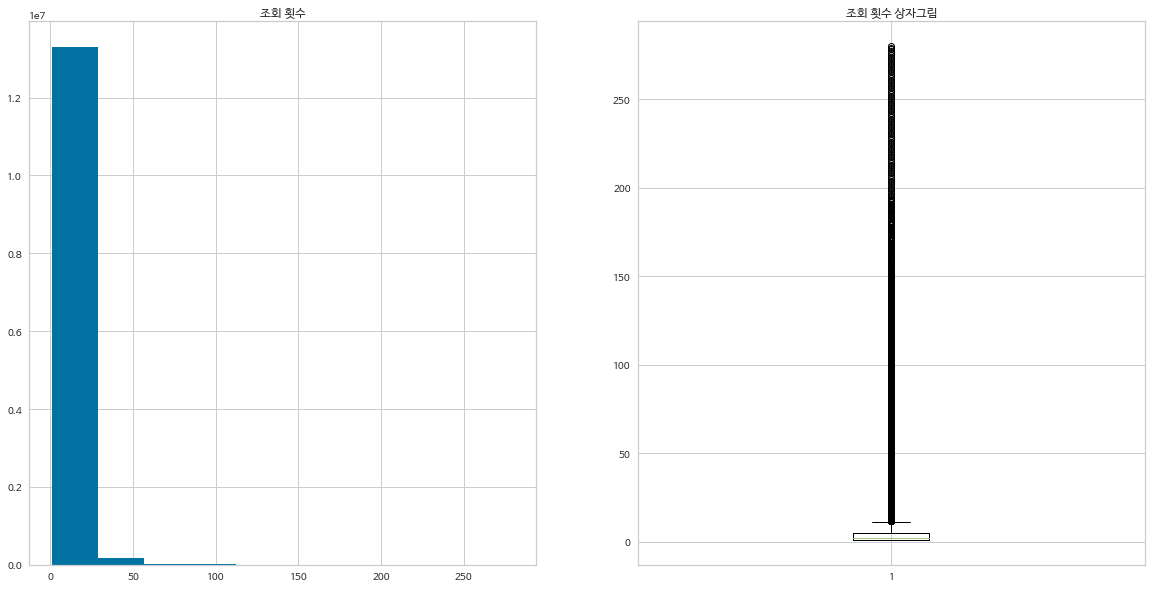

로그 변환 전 왜도 값 : 6.665930648027225
로그 변환 전 첨도 값 : 76.06626839548085


In [ ]:
# 조회 횟수
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('조회 횟수')
plt.hist(df['조회 횟수'])

plt.subplot(1,2,2)
plt.title('조회 횟수 상자그림')
plt.boxplot(df['조회 횟수'])

plt.show()

print('로그 변환 전 왜도 값 : {}'.format(df['조회 횟수'].skew()))
print('로그 변환 전 첨도 값 : {}'.format(df['조회 횟수'].kurt()))

**로그 변환**

In [ ]:
# 조회 횟수 로그 변환 후
df['조회 횟수(로그)'] = np.log1p(df['조회 횟수'])

In [ ]:
df['조회 횟수'].describe()['std']

7.473500060147029

In [ ]:
df['조회 횟수(로그)'].describe()['std']

0.7240767828880172

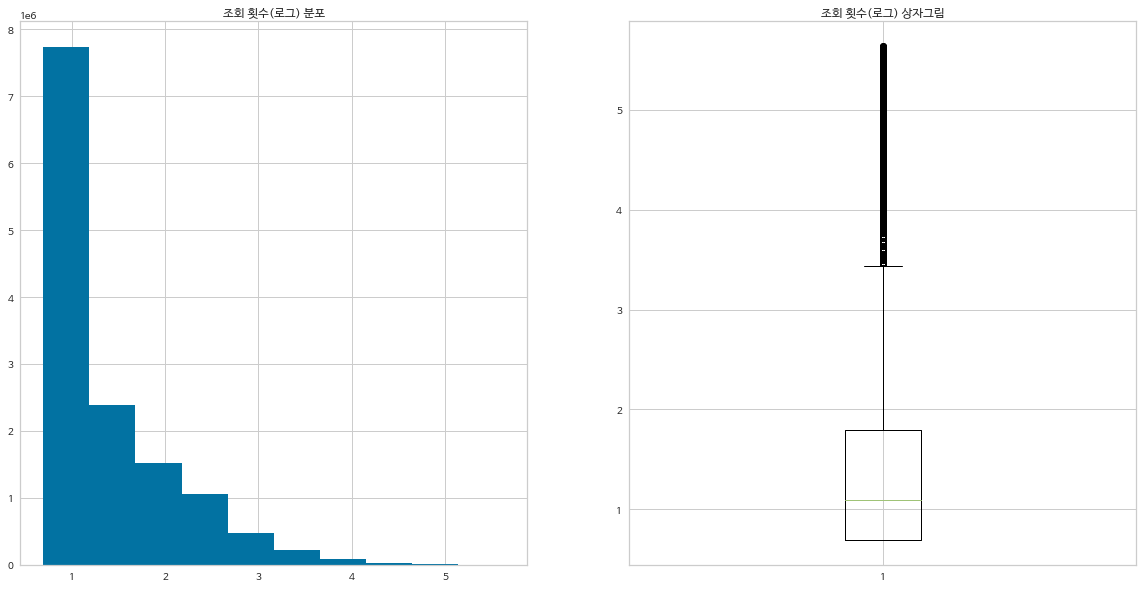

로그 변환 후 왜도 값 : 1.3009307492078033
로그 변환 후 첨도 값 : 1.514671751478089


In [ ]:
# 조회 횟수
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('조회 횟수(로그) 분포')
plt.hist(df['조회 횟수(로그)'])

plt.subplot(1,2,2)
plt.title('조회 횟수(로그) 상자그림')
plt.boxplot(df['조회 횟수(로그)'])

plt.show()

print('로그 변환 후 왜도 값 : {}'.format(df['조회 횟수(로그)'].skew()))
print('로그 변환 후 첨도 값 : {}'.format(df['조회 횟수(로그)'].kurt()))

**Box-Cox 진행**

In [ ]:
PTB = PowerTransformer(method='box-cox')

df['조회 횟수(boxcox)'] = df['조회 횟수']

df['조회 횟수(boxcox)'] = PTB.fit_transform(df[['조회 횟수(boxcox)']])

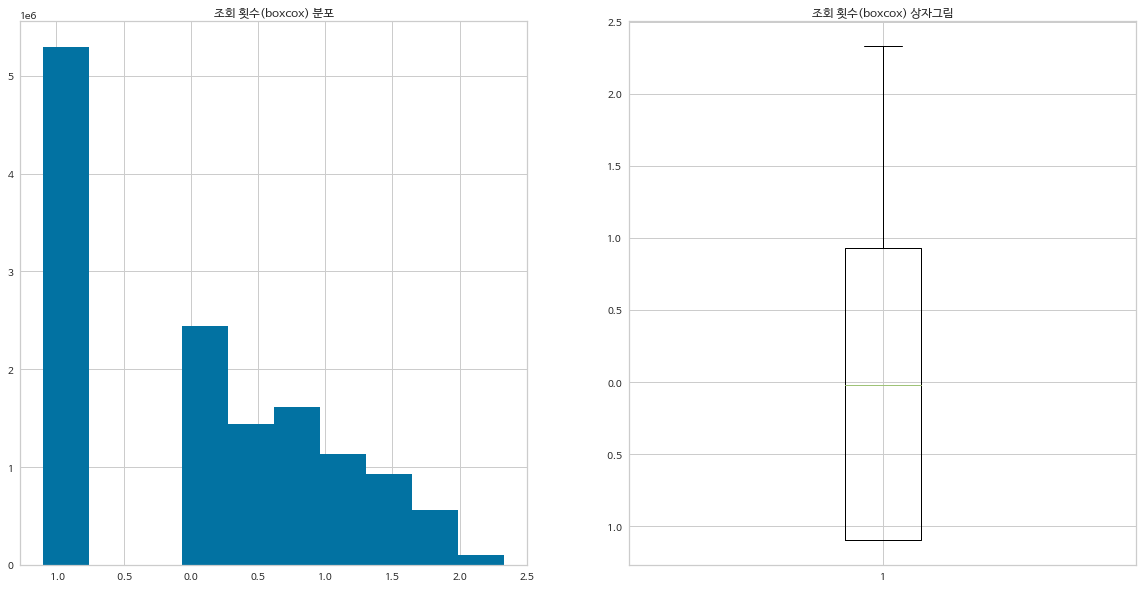

BoxCox 변환 후 왜도 값 : 0.21521763848185096
BoxCox 변환 후 첨도 값 : -1.3248667391494764


In [ ]:
# 조회 횟수
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('조회 횟수(boxcox) 분포')
plt.hist(df['조회 횟수(boxcox)'])

plt.subplot(1,2,2)
plt.title('조회 횟수(boxcox) 상자그림')
plt.boxplot(df['조회 횟수(boxcox)'])

plt.show()

print('BoxCox 변환 후 왜도 값 : {}'.format(df['조회 횟수(boxcox)'].skew()))
print('BoxCox 변환 후 첨도 값 : {}'.format(df['조회 횟수(boxcox)'].kurt()))

In [ ]:
df[['조회 횟수','조회 횟수(로그)','조회 횟수(boxcox)','신청 여부(타겟)']].corr()

,조회 횟수,조회 횟수(로그),조회 횟수(boxcox),신청 여부(타겟)
조회 횟수,1.000000,0.819666,0.628624,0.000217
조회 횟수(로그),0.819666,1.000000,0.941476,0.016242
조회 횟수(boxcox),0.628624,0.941476,1.000000,0.025325
신청 여부(타겟),0.000217,0.016242,0.025325,1.000000


**조회 횟수는 로그 사용**

##### **추천 수**

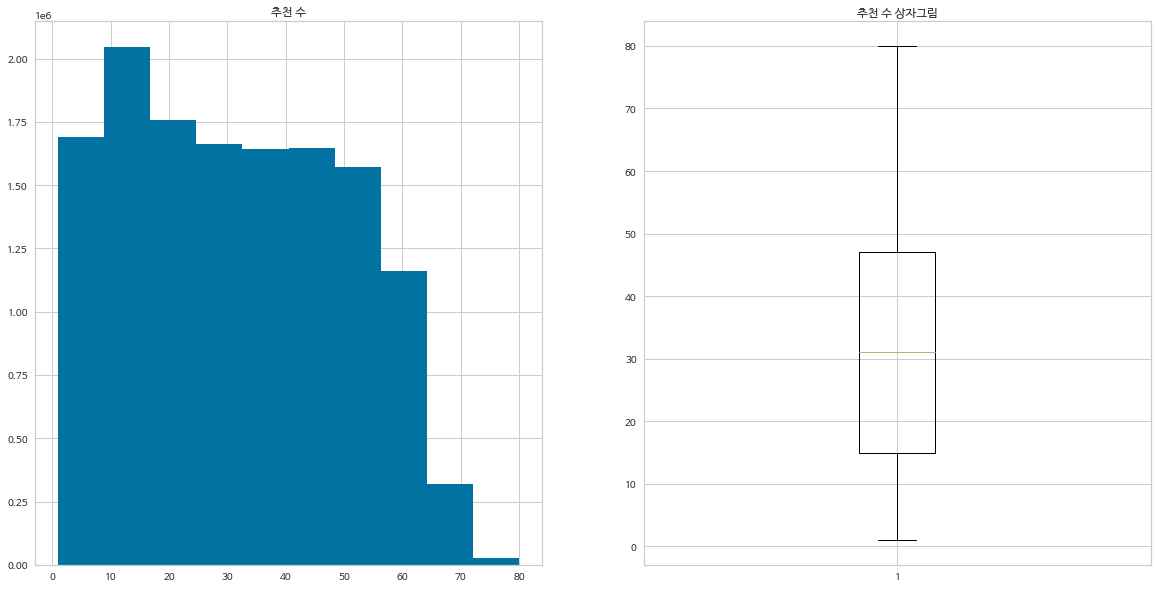

로그 변환 전 왜도 값 : 0.15757304161312655
로그 변환 전 첨도 값 : -1.1125041928245079


In [ ]:
# 추천 수
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('추천 수')
plt.hist(df['추천 수'])

plt.subplot(1,2,2)
plt.title('추천 수 상자그림')
plt.boxplot(df['추천 수'])

plt.show()

print('로그 변환 전 왜도 값 : {}'.format(df['추천 수'].skew()))
print('로그 변환 전 첨도 값 : {}'.format(df['추천 수'].kurt()))

##### **시간차**

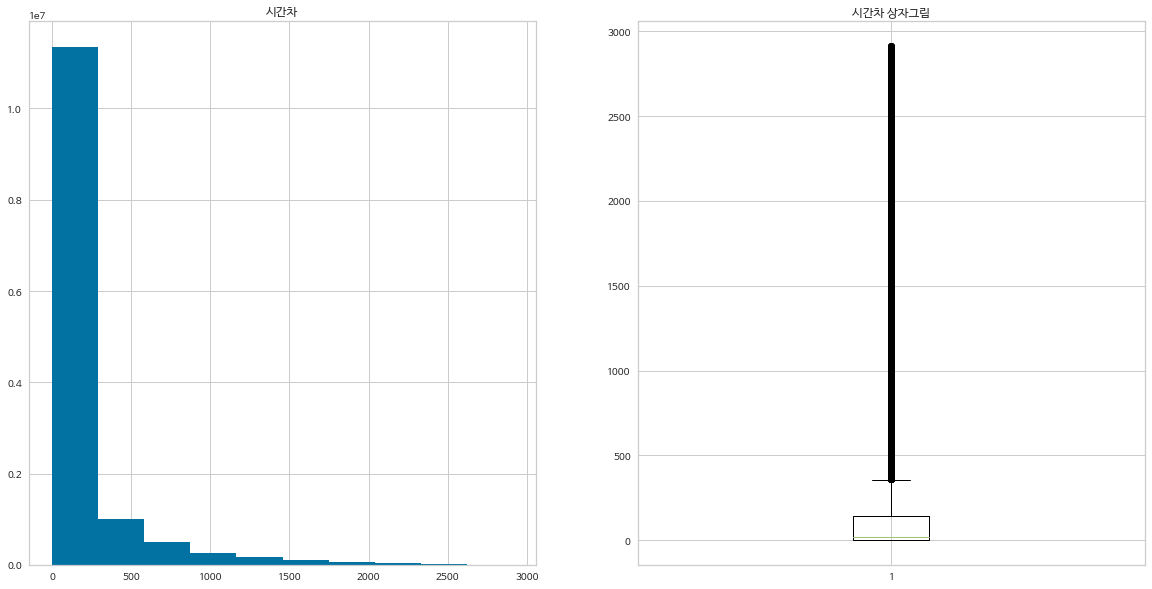

로그 변환 전 왜도 값 : 3.3970144994267866
로그 변환 전 첨도 값 : 13.49826776058306


In [ ]:
# 시간차
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('시간차')
plt.hist(df['시간차'])

plt.subplot(1,2,2)
plt.title('시간차 상자그림')
plt.boxplot(df['시간차'])

plt.show()

print('로그 변환 전 왜도 값 : {}'.format(df['시간차'].skew()))
print('로그 변환 전 첨도 값 : {}'.format(df['시간차'].kurt()))

**로그 변환**

In [ ]:
# 조회 횟수 로그 변환 후
df['시간차(로그)'] = np.log1p(df['시간차'])

In [ ]:
df['시간차'].describe()['std']

340.7859431587836

In [ ]:
df['시간차(로그)'].describe()['std']

2.5668378255693503

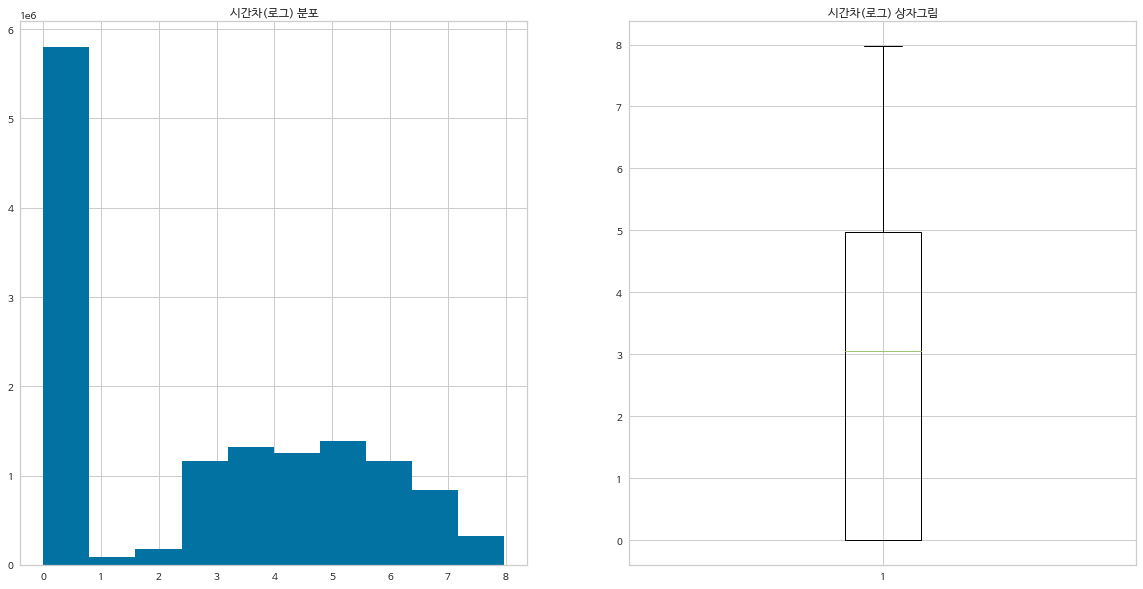

로그 변환 후 왜도 값 : 0.22024052068940636
로그 변환 후 첨도 값 : -1.4639250796721412


In [ ]:
# 시간차
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('시간차(로그) 분포')
plt.hist(df['시간차(로그)'])

plt.subplot(1,2,2)
plt.title('시간차(로그) 상자그림')
plt.boxplot(df['시간차(로그)'])

plt.show()

print('로그 변환 후 왜도 값 : {}'.format(df['시간차(로그)'].skew()))
print('로그 변환 후 첨도 값 : {}'.format(df['시간차(로그)'].kurt()))

In [ ]:
df[['시간차','시간차(로그)','신청 여부(타겟)']].corr()

,시간차,시간차(로그),신청 여부(타겟)
시간차,1.000000,0.679866,-0.003300
시간차(로그),0.679866,1.000000,0.007672
신청 여부(타겟),-0.003300,0.007672,1.000000


**시간차는 로그 선택**

##### **연소득**

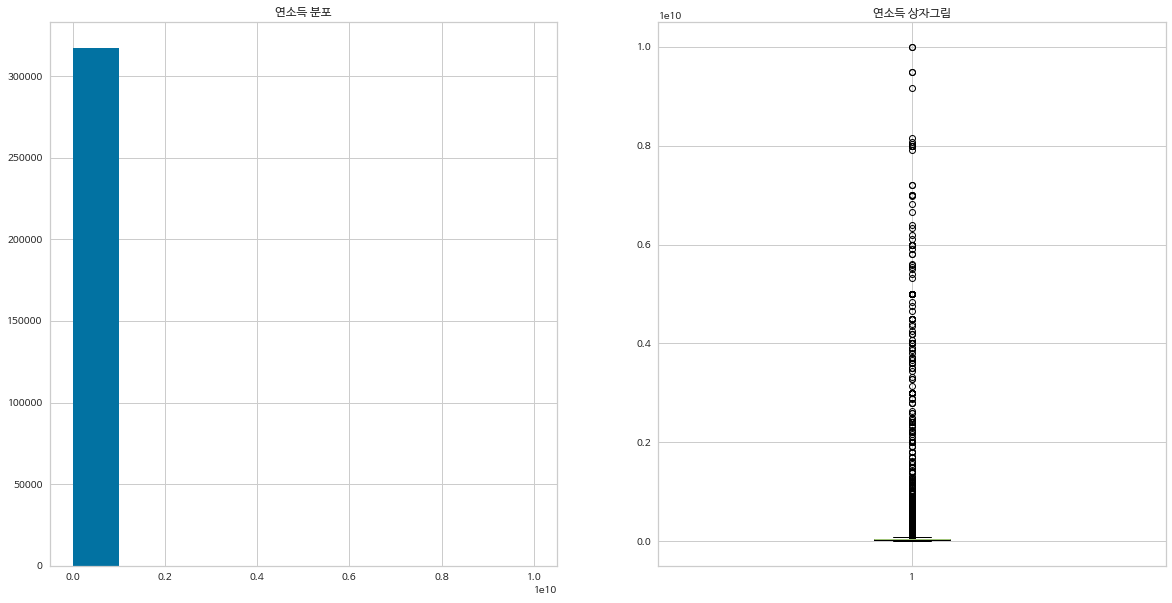

로그 변환 전 왜도 값 : 39.12685443193901
로그 변환 전 첨도 값 : 1908.0732179796216


In [ ]:
# 연소득
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('연소득 분포')
plt.hist(df[df['유저 번호'].duplicated() == False]['연소득'])

plt.subplot(1,2,2)
plt.title('연소득 상자그림')
plt.boxplot(df[df['유저 번호'].duplicated() == False]['연소득'])

plt.show()

print('로그 변환 전 왜도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['연소득'].skew()))
print('로그 변환 전 첨도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['연소득'].kurt()))

In [ ]:
# 연소득 로그 변환 후
df['연소득(로그)'] = np.log1p(df['연소득'])

In [ ]:
df['연소득'].describe()['std']

133593775.45201735

In [ ]:
df['연소득(로그)'].describe()['std']

1.2059239503241392

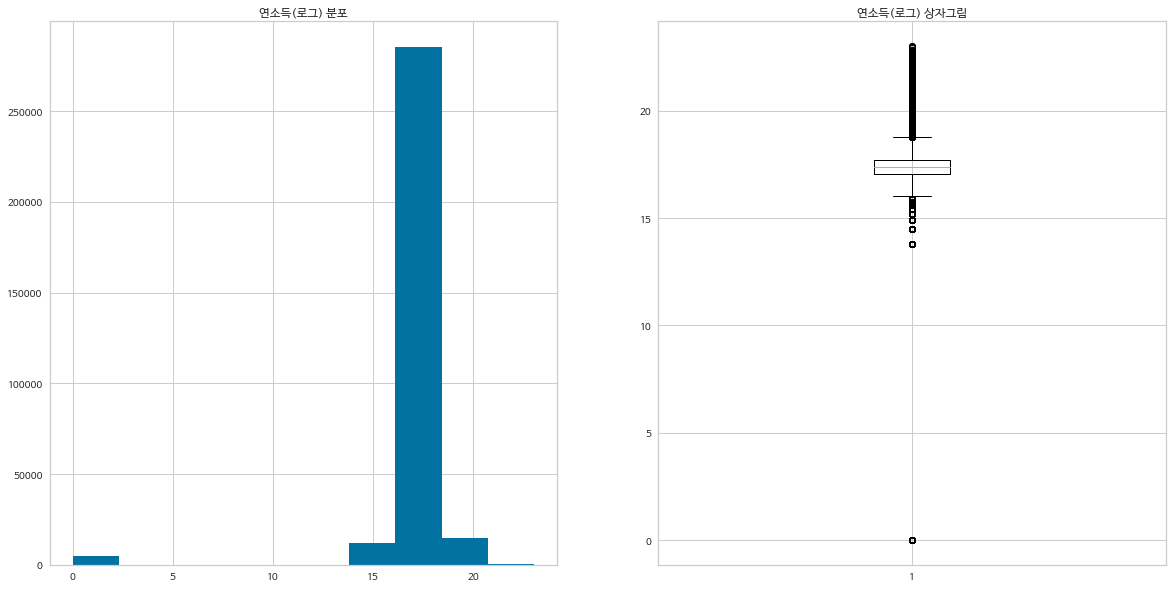

로그 변환 후 왜도 값 : -6.640046274125734
로그 변환 후 첨도 값 : 47.35813701256451


In [ ]:
# 연소득
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('연소득(로그) 분포')
plt.hist(df[df['유저 번호'].duplicated() == False]['연소득(로그)'])

plt.subplot(1,2,2)
plt.title('연소득(로그) 상자그림')
plt.boxplot(df[df['유저 번호'].duplicated() == False]['연소득(로그)'])

plt.show()

print('로그 변환 후 왜도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['연소득(로그)'].skew()))
print('로그 변환 후 첨도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['연소득(로그)'].kurt()))

**Box-Cox 진행**

In [ ]:
PTB = PowerTransformer(method='box-cox')

In [ ]:
df['연소득(boxcox)'] = df['연소득']

In [ ]:
df.loc[df['연소득'] == 0, '연소득(boxcox)'] = 1

In [ ]:
df['연소득(boxcox)'] = PTB.fit_transform(df[['연소득(boxcox)']])

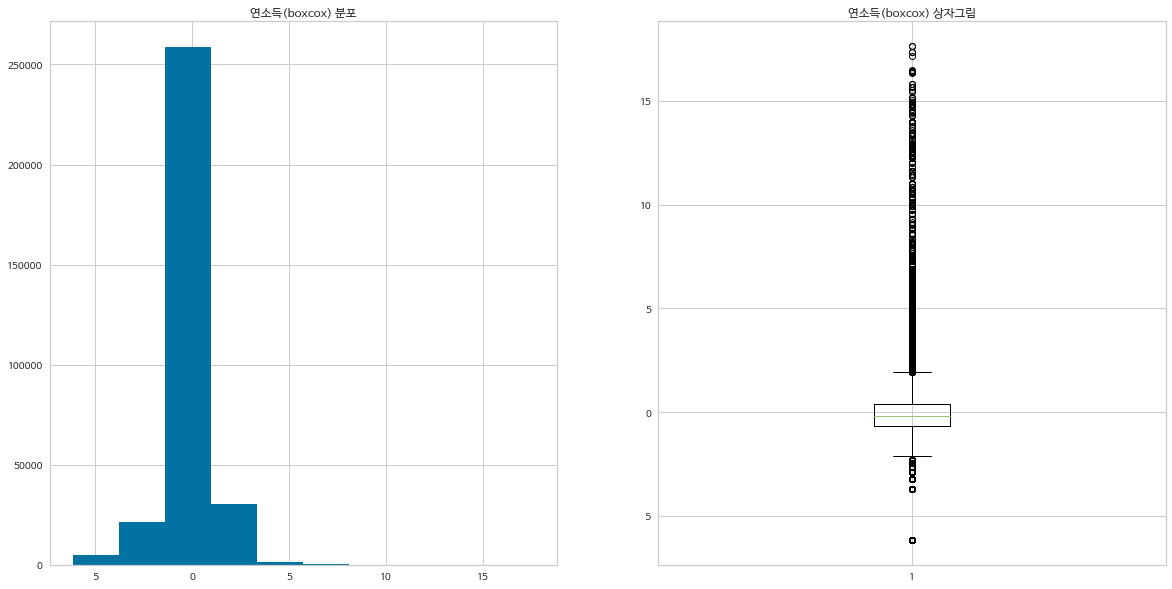

BoxCox 변환 후 왜도 값 : -0.4038842684575382
BoxCox 변환 후 첨도 값 : 14.794026520485275


In [ ]:
# 연소득
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('연소득(boxcox) 분포')
plt.hist(df[df['유저 번호'].duplicated() == False]['연소득(boxcox)'])

plt.subplot(1,2,2)
plt.title('연소득(boxcox) 상자그림')
plt.boxplot(df[df['유저 번호'].duplicated() == False]['연소득(boxcox)'])

plt.show()

print('BoxCox 변환 후 왜도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['연소득(boxcox)'].skew()))
print('BoxCox 변환 후 첨도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['연소득(boxcox)'].kurt()))

In [ ]:
df[['연소득','연소득(로그)','연소득(boxcox)','신청 여부(타겟)']].corr()

,연소득,연소득(로그),연소득(boxcox),신청 여부(타겟)
연소득,1.000000,0.211423,0.532235,-0.006072
연소득(로그),0.211423,1.000000,0.764114,-0.038261
연소득(boxcox),0.532235,0.764114,1.000000,-0.045435
신청 여부(타겟),-0.006072,-0.038261,-0.045435,1.000000


In [ ]:
df[df['유저 번호'].duplicated() == False][['연소득','연소득(로그)','연소득(boxcox)','신청 여부(타겟)']].corr()

,연소득,연소득(로그),연소득(boxcox),신청 여부(타겟)
연소득,1.000000,0.165599,0.477591,-0.018779
연소득(로그),0.165599,1.000000,0.798371,-0.039807
연소득(boxcox),0.477591,0.798371,1.000000,-0.070032
신청 여부(타겟),-0.018779,-0.039807,-0.070032,1.000000


##### **근속월수**

**근속월수가 음수인 유저 발견**

In [ ]:
df[df['유저 번호'] == 563134]['근속월수'].value_counts()

-6.0    48
 4.0    44
Name: 근속월수, dtype: int64

In [ ]:
df.loc[df['유저 번호'] == 563134, '근속월수'] = 4

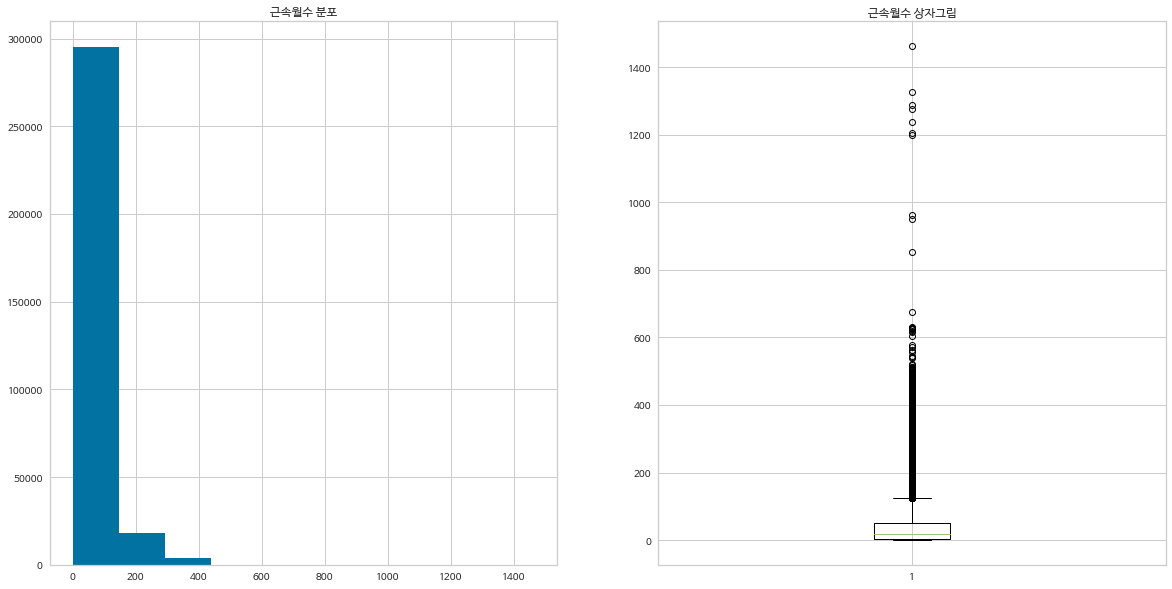

로그 변환 전 왜도 값 : 2.7883367317341037
로그 변환 전 첨도 값 : 11.77700763127613


In [ ]:
# 근속월수
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('근속월수 분포')
plt.hist(df[df['유저 번호'].duplicated() == False]['근속월수'])

plt.subplot(1,2,2)
plt.title('근속월수 상자그림')
plt.boxplot(df[df['유저 번호'].duplicated() == False]['근속월수'])

plt.show()

print('로그 변환 전 왜도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['근속월수'].skew()))
print('로그 변환 전 첨도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['근속월수'].kurt()))

**로그 변환 시도**

In [ ]:
# 로그 변환
df['근속월수(로그)'] = np.log1p(df['근속월수'])

In [ ]:
df[df['유저 번호'].duplicated() == False]['근속월수'].describe()['std']

63.41992131986963

In [ ]:
df[df['유저 번호'].duplicated() == False]['근속월수(로그)'].describe()['std']

1.5865962296493517

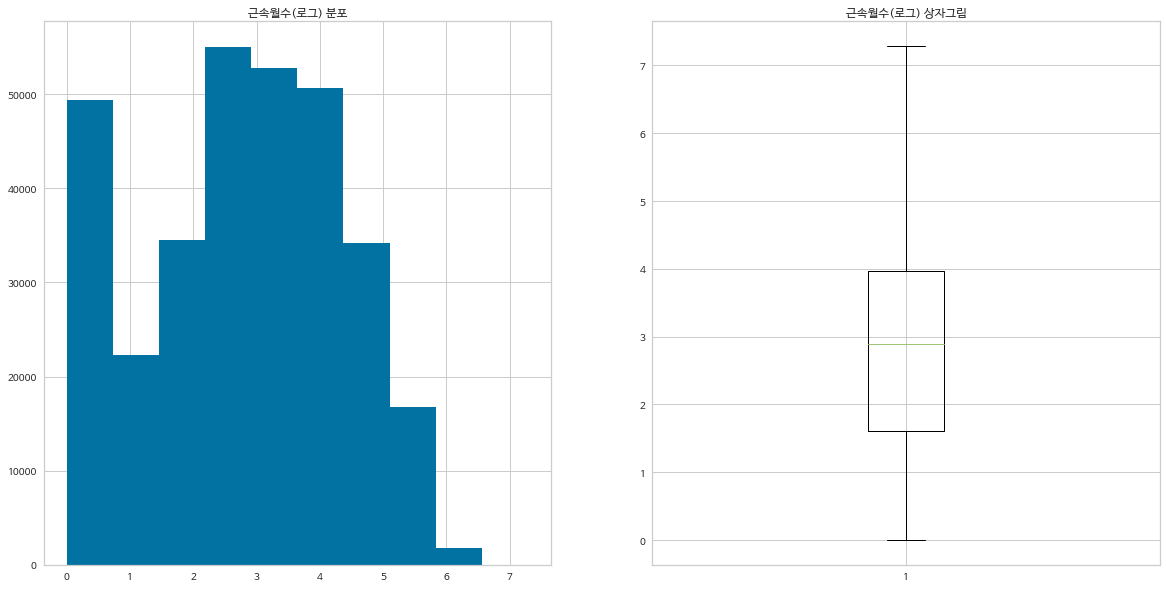

로그 변환 후 왜도 값 : -0.23089947987494774
로그 변환 후 첨도 값 : -0.8157954295479222


In [ ]:
# 근속월수(로그)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('근속월수(로그) 분포')
plt.hist(df[df['유저 번호'].duplicated() == False]['근속월수(로그)'])

plt.subplot(1,2,2)
plt.title('근속월수(로그) 상자그림')
plt.boxplot(df[df['유저 번호'].duplicated() == False]['근속월수(로그)'])

plt.show()

print('로그 변환 후 왜도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['근속월수(로그)'].skew()))
print('로그 변환 후 첨도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['근속월수(로그)'].kurt()))

In [ ]:
df[df['유저 번호'].duplicated() == False][['근속월수','근속월수(로그)','신청 여부(타겟)']].corr()

,근속월수,근속월수(로그),신청 여부(타겟)
근속월수,1.000000,0.757185,-0.064533
근속월수(로그),0.757185,1.000000,-0.104608
신청 여부(타겟),-0.064533,-0.104608,1.000000


In [ ]:
df[['근속월수','근속월수(로그)','신청 여부(타겟)']].corr()

,근속월수,근속월수(로그),신청 여부(타겟)
근속월수,1.000000,0.795665,-0.034043
근속월수(로그),0.795665,1.000000,-0.072581
신청 여부(타겟),-0.034043,-0.072581,1.000000


##### **대출희망금액**

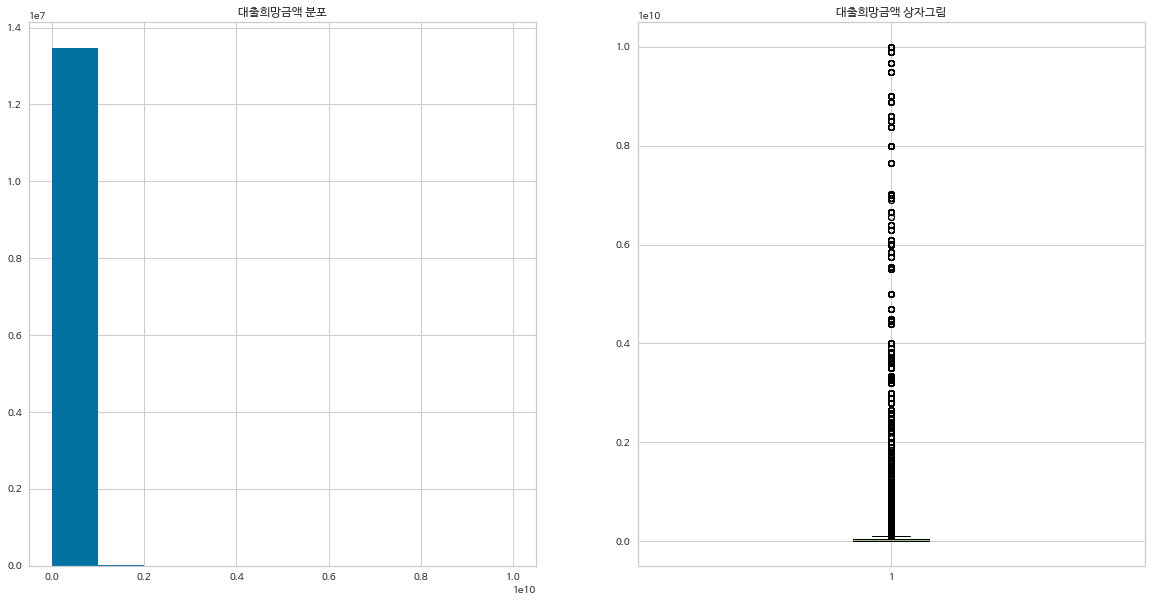

왜도 값 : 29.834450910853768
첨도 값 : 1108.4252973948023


In [ ]:
# 대출희망금액
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('대출희망금액 분포')
plt.hist(df['대출희망금액'])

plt.subplot(1,2,2)
plt.title('대출희망금액 상자그림')
plt.boxplot(df['대출희망금액'])

plt.show()

print('왜도 값 : {}'.format(df['대출희망금액'].skew()))
print('첨도 값 : {}'.format(df['대출희망금액'].kurt()))

In [ ]:
# 대출희망금액 로그 변환 후
df['대출희망금액(로그)'] = np.log1p(df['대출희망금액'])

In [ ]:
df['대출희망금액'].describe()['std']

231759510.412746

In [ ]:
df['대출희망금액(로그)'].describe()['std']

1.345108638012111

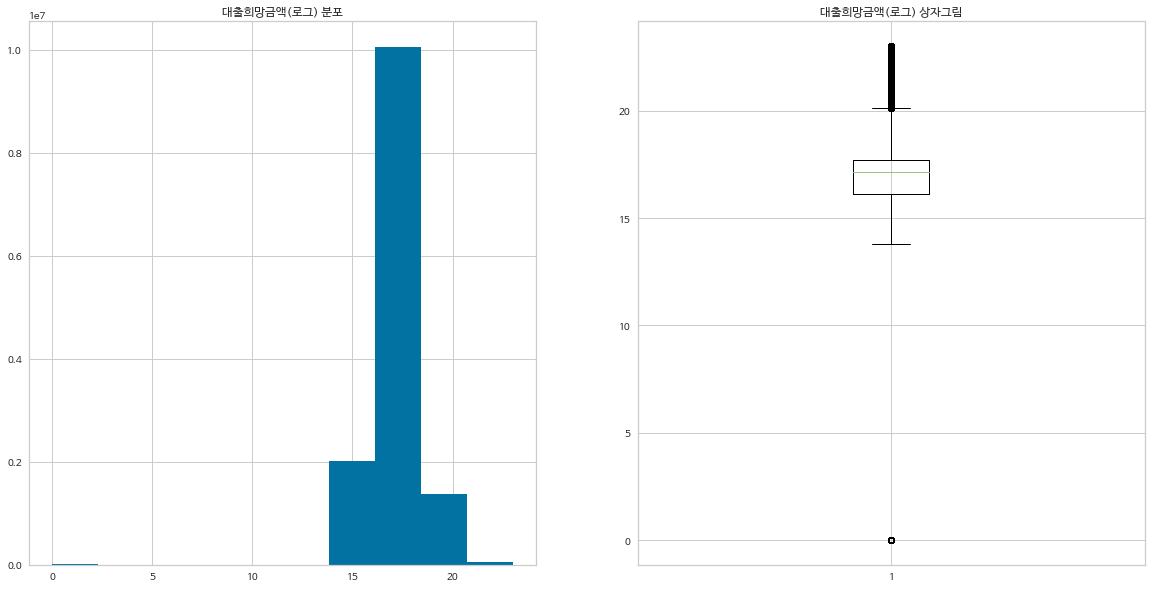

로그 변환 후 왜도 값 : -3.520304739164332
로그 변환 후 첨도 값 : 43.90370679528465


In [ ]:
# 연소득
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('대출희망금액(로그) 분포')
plt.hist(df['대출희망금액(로그)'])

plt.subplot(1,2,2)
plt.title('대출희망금액(로그) 상자그림')
plt.boxplot(df['대출희망금액(로그)'])

plt.show()

print('로그 변환 후 왜도 값 : {}'.format(df['대출희망금액(로그)'].skew()))
print('로그 변환 후 첨도 값 : {}'.format(df['대출희망금액(로그)'].kurt()))

**Box Cox 변환**

In [ ]:
PTB = PowerTransformer(method='box-cox')

In [ ]:
df['대출희망금액(boxcox)'] = df['대출희망금액']
df.loc[df['대출희망금액'] == 0, '대출희망금액(boxcox)'] = 1

In [ ]:
df['대출희망금액(boxcox)'] = PTB.fit_transform(df[['대출희망금액(boxcox)']])

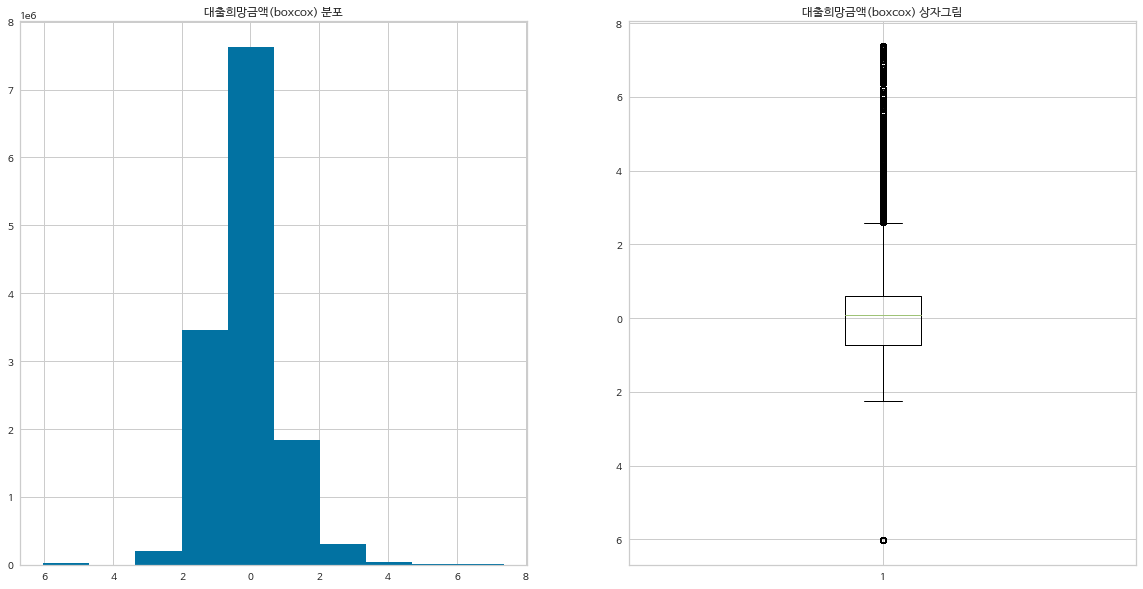

BoxCox 변환 후 왜도 값 : 0.29213068502207895
BoxCox 변환 후 첨도 값 : 4.752243413565013


In [ ]:
# 대출희망금액(boxcox)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('대출희망금액(boxcox) 분포')
plt.hist(df['대출희망금액(boxcox)'])

plt.subplot(1,2,2)
plt.title('대출희망금액(boxcox) 상자그림')
plt.boxplot(df['대출희망금액(boxcox)'])

plt.show()

print('BoxCox 변환 후 왜도 값 : {}'.format(df['대출희망금액(boxcox)'].skew()))
print('BoxCox 변환 후 첨도 값 : {}'.format(df['대출희망금액(boxcox)'].kurt()))

In [ ]:
df[['대출희망금액(로그)','대출희망금액(boxcox)','신청 여부(타겟)']].corr()

,대출희망금액(로그),대출희망금액(boxcox),신청 여부(타겟)
대출희망금액(로그),1.000000,0.947531,-0.123208
대출희망금액(boxcox),0.947531,1.000000,-0.132756
신청 여부(타겟),-0.123208,-0.132756,1.000000


**대출희망금액은 Box Cox 변환을 쓰자** 

In [ ]:
df.columns

Index(['신청서 번호', '한도조회 일시', '금융사 번호', '상품 번호', '승인한도', '승인금리', '신청 여부(타겟)',
       '유저 번호', '생성일시', '근로형태', '고용형태', '주거소유형태', '대출목적', '날짜', '연령', '연령대',
       '신용등급', '개인회생 종류', '연소득', '대출희망금액', '기대출수', '기대출금액', '근속월수',
       '상품 누적 추천 수', '추천 수', '신용점수(보완)', '조회 횟수', '시간차', '기대출수(로그)', '연소득(로그)',
       '연소득(boxcox)', '근속월수(로그)', '대출희망금액(로그)', '대출희망금액(boxcox)'],
      dtype='object')

In [ ]:
df.drop(['대출희망금액(로그)'], axis=1, inplace=True)

##### **신용점수(보완)**

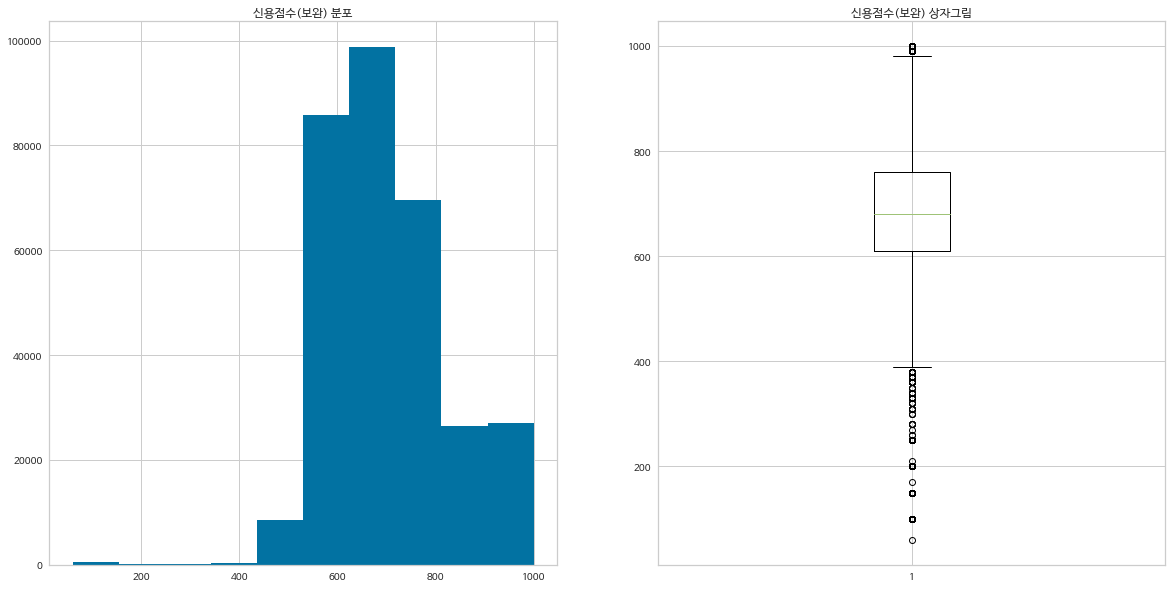

왜도 값 : 0.4209618324265466
첨도 값 : 0.6439370254471508


In [ ]:
# 대출희망금액
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('신용점수(보완) 분포')
plt.hist(df[df['유저 번호'].duplicated() == False]['신용점수(보완)'])

plt.subplot(1,2,2)
plt.title('신용점수(보완) 상자그림')
plt.boxplot(df[df['유저 번호'].duplicated() == False]['신용점수(보완)'])

plt.show()

print('왜도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['신용점수(보완)'].skew()))
print('첨도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['신용점수(보완)'].kurt()))

In [ ]:
df['신용점수(보완)'].describe()

count    1.351984e+07
mean     7.503547e+02
std      1.225522e+02
min      6.000000e+01
25%      6.500000e+02
50%      7.300000e+02
75%      8.400000e+02
max      1.000000e+03
Name: 신용점수(보완), dtype: float64

In [ ]:
df['신용점수(보완)'].describe()['std']

122.55217899953365

In [ ]:
# 신용점수(보완) 로그 변환 후
df['신용점수(로그)'] = np.log1p(df['신용점수(보완)'])

In [ ]:
df['신용점수(로그)'].describe()['std']

0.16469980763192152

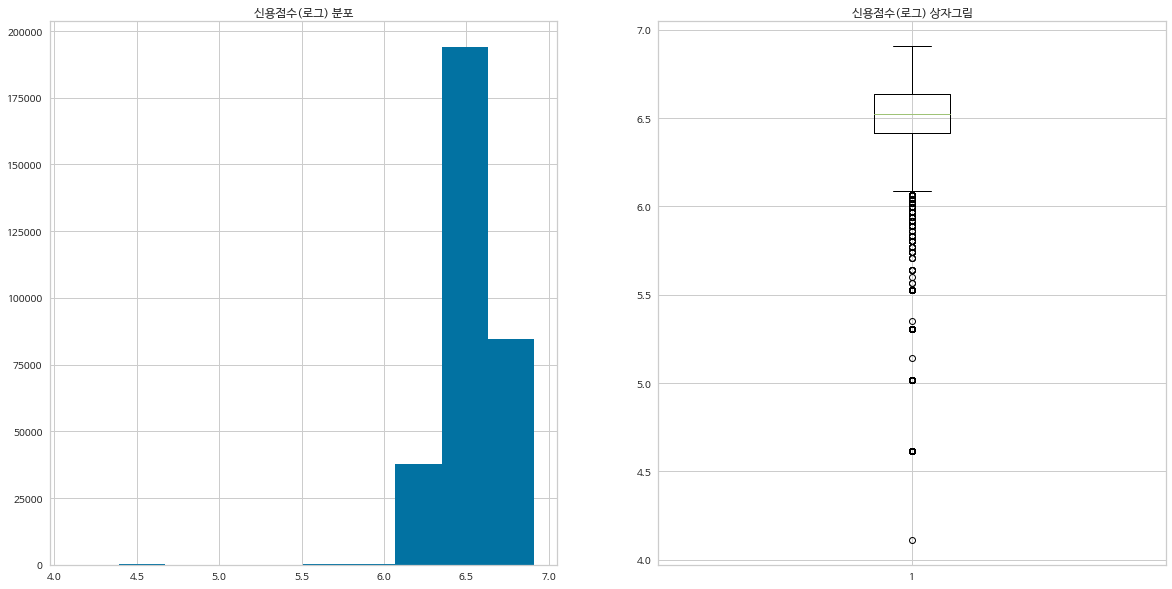

로그 변환 후 왜도 값 : -1.4973130815226545
로그 변환 후 첨도 값 : 16.364457020837445


In [ ]:
# 신용점수(로그)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('신용점수(로그) 분포')
plt.hist(df[df['유저 번호'].duplicated() == False]['신용점수(로그)'])

plt.subplot(1,2,2)
plt.title('신용점수(로그) 상자그림')
plt.boxplot(df[df['유저 번호'].duplicated() == False]['신용점수(로그)'])

plt.show()

print('로그 변환 후 왜도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['신용점수(로그)'].skew()))
print('로그 변환 후 첨도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['신용점수(로그)'].kurt()))

**Box Cox 변환**

In [ ]:
PTB = PowerTransformer(method='box-cox')
df['신용점수(boxcox)'] = df['신용점수(보완)']
# df.loc[df['연소득'] == 0, '연소득(boxcox)'] = 1
df['신용점수(boxcox)'] = PTB.fit_transform(df[['신용점수(boxcox)']])

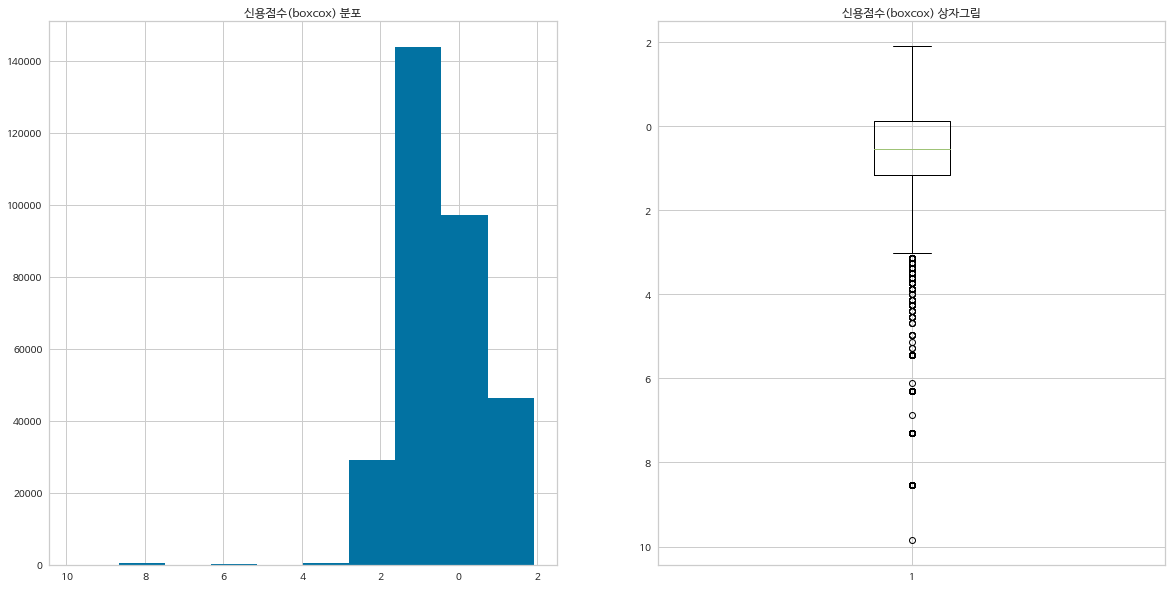

BoxCox 변환 후 왜도 값 : -0.34229612238602825
BoxCox 변환 후 첨도 값 : 4.6600735210227


In [ ]:
# 신용점수
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('신용점수(boxcox) 분포')
plt.hist(df[df['유저 번호'].duplicated() == False]['신용점수(boxcox)'])

plt.subplot(1,2,2)
plt.title('신용점수(boxcox) 상자그림')
plt.boxplot(df[df['유저 번호'].duplicated() == False]['신용점수(boxcox)'])

plt.show()

print('BoxCox 변환 후 왜도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['신용점수(boxcox)'].skew()))
print('BoxCox 변환 후 첨도 값 : {}'.format(df[df['유저 번호'].duplicated() == False]['신용점수(boxcox)'].kurt()))

In [ ]:
df[df['유저 번호'].duplicated() == False][['신용점수(보완)','신용점수(로그)','신용점수(boxcox)','신청 여부(타겟)']].corr()

,신용점수(보완),신용점수(로그),신용점수(boxcox),신청 여부(타겟)
신용점수(보완),1.000000,0.970146,0.991841,-0.283141
신용점수(로그),0.970146,1.000000,0.993004,-0.277480
신용점수(boxcox),0.991841,0.993004,1.000000,-0.283431
신청 여부(타겟),-0.283141,-0.277480,-0.283431,1.000000


**신용점수는 그대로 가거나 box cox 변환**

##### **승인금리, 구분 만들기**

In [ ]:
# 승임금리로 저,중,고금리로 범주형으로 변환
bins = [0, 5.99, 13.99, 20]
labels = ['저금리','중금리','고금리']

df['금리구분'] = pd.cut(df['승인금리'], bins=bins, labels=labels)

In [ ]:
df[['승인금리','금리구분']].head()

,승인금리,금리구분
0,13.6,중금리
1,17.9,고금리
2,18.5,고금리
3,10.8,중금리
4,16.4,고금리


##### **최종 데이터셋 구성**

In [ ]:
df.columns

Index(['신청서 번호', '한도조회 일시', '금융사 번호', '상품 번호', '승인한도', '승인금리', '신청 여부(타겟)',
       '유저 번호', '생성일시', '근로형태', '고용형태', '주거소유형태', '대출목적', '날짜', '연령', '연령대',
       '신용등급', '개인회생 종류', '연소득', '대출희망금액', '기대출수', '기대출금액', '근속월수',
       '상품 누적 추천 수', '추천 수', '신용점수(보완)', '조회 횟수', '시간차', '기대출수(로그)', '연소득(로그)',
       '연소득(boxcox)', '근속월수(로그)', '대출희망금액(boxcox)', '신용점수(로그)', '신용점수(boxcox)',
       '금리구분', '승인한도(로그)', '승인한도(boxcox)', '상품 누적 추천 수(로그)',
       '상품 누적 추천 수(boxcox)', '조회 횟수(로그)', '조회 횟수(boxcox)', '시간차(로그)',
       '시간차(boxcox)'],
      dtype='object')

In [ ]:
df_final = df[['승인한도', '승인금리', '신청 여부(타겟)', '근로형태', '고용형태', '주거소유형태', '대출목적',
               '연령대', '개인회생 종류', '추천 수', '신용점수(보완)', '기대출수(로그)',
               '연소득(boxcox)', '근속월수(로그)', '대출희망금액(boxcox)', '상품 누적 추천 수(로그)', '조회 횟수(로그)','시간차(로그)']]

In [ ]:
df_final.corr()

,승인한도,승인금리,신청 여부(타겟),추천 수,신용점수(보완),기대출수(로그),연소득(boxcox),근속월수(로그),대출희망금액(boxcox),상품 누적 추천 수(로그),조회 횟수(로그),시간차(로그)
승인한도,1.000000,-0.017229,-0.029387,0.088463,0.075146,-0.034510,0.067230,0.034592,0.047614,-0.012339,-0.021475,-0.012935
승인금리,-0.017229,1.000000,-0.052392,-0.244367,-0.231486,0.112982,-0.016973,-0.067089,-0.092929,0.035901,0.056827,0.044996
신청 여부(타겟),-0.029387,-0.052392,1.000000,-0.233290,-0.168648,0.069609,-0.045435,-0.072581,-0.132756,-0.013684,0.016242,0.007672
추천 수,0.088463,-0.244367,-0.233290,1.000000,0.581350,-0.262286,0.132762,0.251932,0.261644,-0.122433,-0.200407,-0.087227
신용점수(보완),0.075146,-0.231486,-0.168648,0.581350,1.000000,-0.220899,0.185262,0.174680,0.304851,-0.092021,-0.164628,-0.094059
기대출수(로그),-0.034510,0.112982,0.069609,-0.262286,-0.220899,1.000000,0.043106,0.081391,-0.130372,0.173214,0.215175,0.189758
연소득(boxcox),0.067230,-0.016973,-0.045435,0.132762,0.185262,0.043106,1.000000,0.368202,0.286817,-0.021864,-0.031199,-0.009366
근속월수(로그),0.034592,-0.067089,-0.072581,0.251932,0.174680,0.081391,0.368202,1.000000,0.182895,-0.017663,-0.042022,-0.007336
대출희망금액(boxcox),0.047614,-0.092929,-0.132756,0.261644,0.304851,-0.130372,0.286817,0.182895,1.000000,-0.070875,-0.103859,-0.096533
상품 누적 추천 수(로그),-0.012339,0.035901,-0.013684,-0.122433,-0.092021,0.173214,-0.021864,-0.017663,-0.070875,1.000000,0.872234,0.424225


In [ ]:
df_final[df_final['유저 번호'].duplicated() == False].corr()

,승인한도,신청 여부(타겟),유저 번호,상품 누적 추천 수,추천 수,신용점수(보완),조회 횟수,시간차,기대출수(로그),연소득(boxcox),근속월수(로그),대출희망금액(boxcox)
승인한도,1.000000,-0.041861,0.003122,-0.013221,0.212092,0.155155,-0.019862,-0.010970,-0.062799,0.124405,0.074655,0.116839
신청 여부(타겟),-0.041861,1.000000,0.000777,-0.023793,-0.349983,-0.283141,-0.001824,0.011059,0.108363,-0.070032,-0.104608,-0.260439
유저 번호,0.003122,0.000777,1.000000,0.001942,0.004815,0.001664,0.001081,0.001804,-0.001090,0.004710,0.001824,0.000901
상품 누적 추천 수,-0.013221,-0.023793,0.001942,1.000000,-0.051295,-0.064569,0.818430,0.085471,0.126287,0.008167,0.014976,-0.041789
추천 수,0.212092,-0.349983,0.004815,-0.051295,1.000000,0.568051,-0.084347,-0.037747,-0.204059,0.170490,0.261586,0.344389
신용점수(보완),0.155155,-0.283141,0.001664,-0.064569,0.568051,1.000000,-0.101650,-0.063062,-0.276137,0.091471,0.084791,0.340727
조회 횟수,-0.019862,-0.001824,0.001081,0.818430,-0.084347,-0.101650,1.000000,0.140034,0.150587,0.009387,0.009662,-0.057507
시간차,-0.010970,0.011059,0.001804,0.085471,-0.037747,-0.063062,0.140034,1.000000,0.121371,0.016965,0.032869,-0.038402
기대출수(로그),-0.062799,0.108363,-0.001090,0.126287,-0.204059,-0.276137,0.150587,0.121371,1.000000,0.070788,0.112510,-0.092146
연소득(boxcox),0.124405,-0.070032,0.004710,0.008167,0.170490,0.091471,0.009387,0.016965,0.070788,1.000000,0.409741,0.295714


**상관관계 보고 조회 횟수 뺀다**

##### **Feature Selection**

In [ ]:
df_final.columns

Index(['승인한도', '승인금리', '신청 여부(타겟)', '근로형태', '고용형태', '주거소유형태', '대출목적', '연령대',
       '개인회생 종류', '추천 수', '신용점수(보완)', '기대출수(로그)', '연소득(boxcox)', '근속월수(로그)',
       '대출희망금액(boxcox)', '상품 누적 추천 수(로그)', '조회 횟수(로그)', '시간차(로그)'],
      dtype='object')

In [ ]:
# 범주형 변수 원핫 인코딩
df_final = pd.get_dummies(data=df_final, columns = ['개인회생 종류','연령대','주거소유형태','고용형태','근로형태','대출목적'])

In [ ]:
# train, test 로 분리
train = df_final[-df_final['신청 여부(타겟)'].isna()]
test = df_final[df_final['신청 여부(타겟)'].isna()]

In [ ]:
# 세부적으로 분리
X_train = train.drop(['신청 여부(타겟)'], axis=1)
y_train = train[['신청 여부(타겟)']]

X_test = test.drop(['신청 여부(타겟)'], axis=1)
y_test = test[['신청 여부(타겟)']]

In [ ]:
# 수치형 변수
X_train_num = X_train[['승인한도','승인금리','추천 수','신용점수(보완)','기대출수(로그)','연소득(boxcox)','근속월수(로그)','대출희망금액(boxcox)','상품 누적 추천 수(로그)','조회 횟수(로그)','시간차(로그)']]
X_test_num = X_test[['승인한도','승인금리','추천 수','신용점수(보완)','기대출수(로그)','연소득(boxcox)','근속월수(로그)','대출희망금액(boxcox)','상품 누적 추천 수(로그)','조회 횟수(로그)','시간차(로그)']]

In [ ]:
# MinMaxScaler 적용
Scaler = MinMaxScaler()

X_train_mm = Scaler.fit_transform(X_train_num)
X_test_mm = Scaler.transform(X_test_num)

X_train_mm = pd.DataFrame(X_train_mm, columns = ['승인한도','승인금리','추천 수','신용점수(보완)','기대출수(로그)','연소득(boxcox)','근속월수(로그)','대출희망금액(boxcox)','상품 누적 추천 수(로그)','조회 횟수(로그)','시간차(로그)'])
X_test_mm = pd.DataFrame(X_test_mm, columns = ['승인한도','승인금리','추천 수','신용점수(보완)','기대출수(로그)','연소득(boxcox)','근속월수(로그)','대출희망금액(boxcox)','상품 누적 추천 수(로그)','조회 횟수(로그)','시간차(로그)'])

In [ ]:
# 기존 train, test 데이터 인덱스 초기화
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
X_train.drop(['승인한도','승인금리','추천 수','신용점수(보완)','기대출수(로그)','연소득(boxcox)','근속월수(로그)','대출희망금액(boxcox)','상품 누적 추천 수(로그)','조회 횟수(로그)','시간차(로그)'], axis=1, inplace=True)
X_test.drop(['승인한도','승인금리','추천 수','신용점수(보완)','기대출수(로그)','연소득(boxcox)','근속월수(로그)','대출희망금액(boxcox)','상품 누적 추천 수(로그)','조회 횟수(로그)','시간차(로그)'], axis=1, inplace=True)

X_train = pd.concat([X_train, X_train_mm], axis=1)
X_test = pd.concat([X_test, X_test_mm], axis=1)

**Decision Tree로 중요 변수 추출**

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [ ]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
fi_dt = pd.DataFrame(clf_dt.feature_importances_, index =X_train.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)

In [ ]:
fi_dt

,feature importance
추천 수,0.153211
승인금리,0.122678
승인한도,0.089638
근속월수(로그),0.078430
연소득(boxcox),0.074633
신용점수(보완),0.071003
시간차(로그),0.070437
대출희망금액(boxcox),0.060891
기대출수(로그),0.049752
상품 누적 추천 수(로그),0.042668


**범주형 변수 중요도**

In [ ]:
# 연령대 변수 중요도
fi_dt.loc['연령대_20대','feature importance'] + fi_dt.loc['연령대_30대','feature importance'] + fi_dt.loc['연령대_40대','feature importance'] + fi_dt.loc['연령대_50대','feature importance'] + fi_dt.loc['연령대_60대','feature importance'] + fi_dt.loc['연령대_70대','feature importance'] + fi_dt.loc['연령대_80대 이상','feature importance'] + fi_dt.loc['연령대_알수없음','feature importance']

0.04235343592406872

In [ ]:
# 근로형태 변수 중요도
fi_dt.loc['근로형태_직장가입자(4대보험O)','feature importance'] + fi_dt.loc['근로형태_직장가입자(4대보험X)','feature importance'] + fi_dt.loc['근로형태_개인사업자','feature importance'] + fi_dt.loc['근로형태_기타소득','feature importance'] + fi_dt.loc['근로형태_프리랜서','feature importance'] + fi_dt.loc['근로형태_전문직','feature importance']

0.01999043020200806

In [ ]:
# 주거소유형태 변수 중요도
fi_dt.loc['주거소유형태_전월세','feature importance'] + fi_dt.loc['주거소유형태_기타가족소유','feature importance'] + fi_dt.loc['주거소유형태_자가','feature importance']

0.026182652798265864

In [ ]:
# 대출목적 변수 중요도
fi_dt.loc['대출목적_생활비','feature importance'] + fi_dt.loc['대출목적_대환대출','feature importance'] + fi_dt.loc['대출목적_전월세보증금','feature importance'] + fi_dt.loc['대출목적_주택구입','feature importance'] + fi_dt.loc['대출목적_사업자금','feature importance'] + fi_dt.loc['대출목적_기타','feature importance'] + fi_dt.loc['대출목적_투자','feature importance'] + fi_dt.loc['대출목적_자동차구입','feature importance']

0.026524394841337232

In [ ]:
# 개인회생 종류 변수 중요도
fi_dt.loc['개인회생 종류_CASE1','feature importance'] + fi_dt.loc['개인회생 종류_CASE4','feature importance'] + fi_dt.loc['개인회생 종류_CASE2','feature importance'] + fi_dt.loc['개인회생 종류_CASE3','feature importance']

0.014554541162783586

In [ ]:
# 고용형태 변수 중요도
fi_dt.loc['고용형태_정규직','feature importance'] + fi_dt.loc['고용형태_계약직','feature importance'] + fi_dt.loc['고용형태_기타','feature importance'] + fi_dt.loc['고용형태_일용직','feature importance'] 

0.017825958868309608

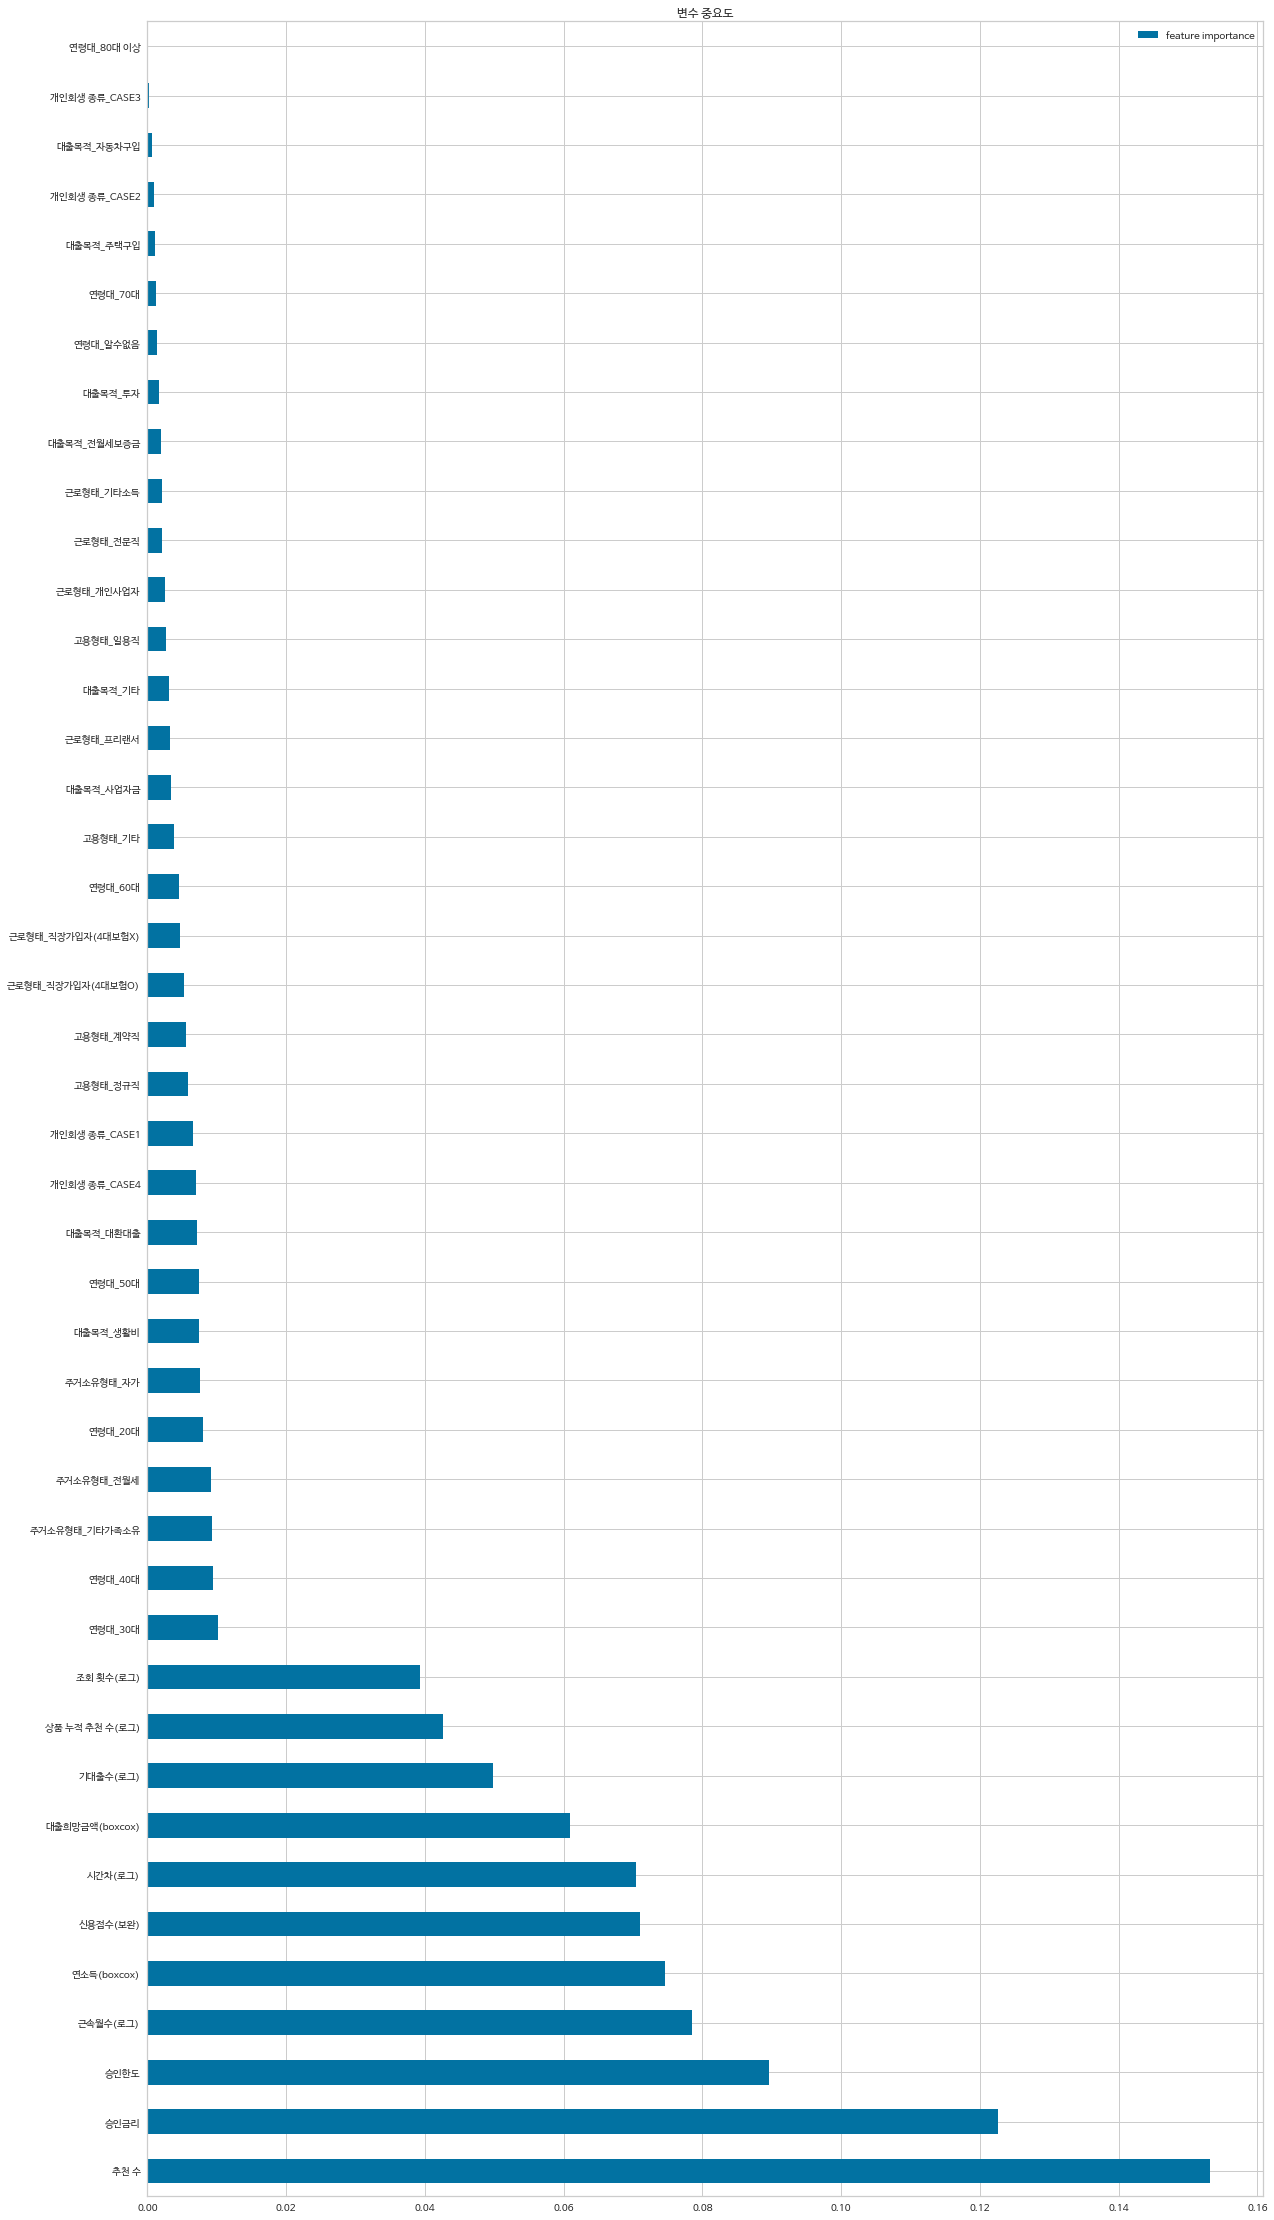

In [ ]:
fi_dt.plot(kind='barh', title='변수 중요도', figsize=(20,40))

In [ ]:
y_pred = clf_dt.predict(X_valid)

In [ ]:
f1_score(y_valid, y_pred)

0.3147795556176635

In [ ]:
confusion_matrix(y_valid, y_pred)

array([[1859925,   82010],
       [  74900,   36041]])

In [ ]:
fi_dt.index[:11]

Index(['추천 수', '승인금리', '승인한도', '근속월수(로그)', '연소득(boxcox)', '신용점수(보완)',
       '시간차(로그)', '대출희망금액(boxcox)', '기대출수(로그)', '상품 누적 추천 수(로그)', '조회 횟수(로그)'],
      dtype='object')

**추가로 연령대, 주거소유형태, 대출목적(생활비, 대환대출)로 데이터 완성** 

In [ ]:
df.columns

Index(['신청서 번호', '한도조회 일시', '금융사 번호', '상품 번호', '승인한도', '승인금리', '신청 여부(타겟)',
       '유저 번호', '생성일시', '근로형태', '고용형태', '주거소유형태', '대출목적', '날짜', '연령', '연령대',
       '신용등급', '개인회생 종류', '연소득', '대출희망금액', '기대출수', '기대출금액', '근속월수',
       '상품 누적 추천 수', '추천 수', '신용점수(보완)', '조회 횟수', '시간차', '기대출수(로그)', '연소득(로그)',
       '연소득(boxcox)', '근속월수(로그)', '대출희망금액(boxcox)', '신용점수(로그)', '신용점수(boxcox)',
       '금리구분', '승인한도(로그)', '승인한도(boxcox)', '상품 누적 추천 수(로그)',
       '상품 누적 추천 수(boxcox)', '조회 횟수(로그)', '조회 횟수(boxcox)', '시간차(로그)',
       '시간차(boxcox)'],
      dtype='object')

In [ ]:
# 최종 데이터셋
data_final = df[['신청서 번호','금융사 번호','상품 번호','신청 여부(타겟)','유저 번호','생성일시','주거소유형태','대출목적','연령대',
                 '추천 수','승인금리','승인한도','근속월수(로그)','연소득(boxcox)','신용점수(보완)','시간차(로그)', 
                 '대출희망금액(boxcox)','기대출수(로그)','상품 누적 추천 수(로그)','조회 횟수(로그)']]

In [ ]:
data_final.corr()

,신청서 번호,신청 여부(타겟),유저 번호,추천 수,승인금리,승인한도,근속월수(로그),연소득(boxcox),신용점수(보완),시간차(로그),대출희망금액(boxcox),기대출수(로그),상품 누적 추천 수(로그),조회 횟수(로그)
신청서 번호,1.000000,0.000438,-0.001701,-0.000544,0.000108,-0.000101,0.000478,0.000348,-0.000709,0.001839,0.001339,0.001481,0.000463,0.000314
신청 여부(타겟),0.000438,1.000000,0.000233,-0.233290,-0.052392,-0.029387,-0.072581,-0.045435,-0.168648,0.007672,-0.132756,0.069609,-0.013684,0.016242
유저 번호,-0.001701,0.000233,1.000000,0.005095,-0.001444,0.000749,0.000840,0.004441,0.007458,-0.000968,0.001426,-0.004428,0.002936,0.002356
추천 수,-0.000544,-0.233290,0.005095,1.000000,-0.244367,0.088463,0.251932,0.132762,0.581350,-0.087227,0.261644,-0.262286,-0.122433,-0.200407
승인금리,0.000108,-0.052392,-0.001444,-0.244367,1.000000,-0.017229,-0.067089,-0.016973,-0.231486,0.044996,-0.092929,0.112982,0.035901,0.056827
승인한도,-0.000101,-0.029387,0.000749,0.088463,-0.017229,1.000000,0.034592,0.067230,0.075146,-0.012935,0.047614,-0.034510,-0.012339,-0.021475
근속월수(로그),0.000478,-0.072581,0.000840,0.251932,-0.067089,0.034592,1.000000,0.368202,0.174680,-0.007336,0.182895,0.081391,-0.017663,-0.042022
연소득(boxcox),0.000348,-0.045435,0.004441,0.132762,-0.016973,0.067230,0.368202,1.000000,0.185262,-0.009366,0.286817,0.043106,-0.021864,-0.031199
신용점수(보완),-0.000709,-0.168648,0.007458,0.581350,-0.231486,0.075146,0.174680,0.185262,1.000000,-0.094059,0.304851,-0.220899,-0.092021,-0.164628
시간차(로그),0.001839,0.007672,-0.000968,-0.087227,0.044996,-0.012935,-0.007336,-0.009366,-0.094059,1.000000,-0.096533,0.189758,0.424225,0.518751


In [ ]:
data_final.to_csv(ROOT + 'Dataset.csv', index=False)

##### **AutoML**

In [ ]:
data_final = pd.read_csv(ROOT + 'Dataset.csv')

In [ ]:
df = data_final.copy()

In [ ]:
df.columns

Index(['신청서 번호', '금융사 번호', '상품 번호', '신청 여부(타겟)', '유저 번호', '생성일시', '주거소유형태',
       '대출목적', '연령대', '추천 수', '승인금리', '승인한도', '근속월수(로그)', '연소득(boxcox)',
       '신용점수(보완)', '시간차(로그)', '대출희망금액(boxcox)', '기대출수(로그)', '상품 누적 추천 수(로그)',
       '조회 횟수(로그)'],
      dtype='object')

In [ ]:
train = df[-df['신청 여부(타겟)'].isna()]
test = df[df['신청 여부(타겟)'].isna()]

In [ ]:
# # 범주형 변수 원핫 인코딩
# df = pd.get_dummies(data=df, columns = ['연령대','주거소유형태','대출목적'])

In [ ]:
X_train = train.drop(['신청 여부(타겟)'], axis=1)
y_train = train[['신청 여부(타겟)']]

X_test = test.drop(['신청 여부(타겟)'], axis=1)
y_test = test[['신청 여부(타겟)']]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, random_state=42)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

신청 여부(타겟)
0.0          7282255
1.0           416027
dtype: int64

In [ ]:
y_resampled.value_counts()

신청 여부(타겟)
0.0          416027
1.0          416027
dtype: int64

In [ ]:
y_valid.value_counts()

신청 여부(타겟)
0.0          2427418
1.0           138676
dtype: int64

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
train_under = pd.concat([X_resampled, y_resampled], axis=1)
valid = pd.concat([X_valid, y_valid], axis=1)

In [ ]:
# # 수치형 변수
# X_train_num = X_train[['추천 수','승인금리','승인한도','근속월수(로그)','연소득(boxcox)','신용점수(보완)','시간차(로그)','대출희망금액(boxcox)','기대출수(로그)','상품 누적 추천 수(로그)','조회 횟수(로그)']]

# X_valid_num = X_valid[['추천 수','승인금리','승인한도','근속월수(로그)','연소득(boxcox)','신용점수(보완)','시간차(로그)','대출희망금액(boxcox)','기대출수(로그)','상품 누적 추천 수(로그)','조회 횟수(로그)']]

# X_test_num = X_test[['추천 수','승인금리','승인한도','근속월수(로그)','연소득(boxcox)','신용점수(보완)','시간차(로그)','대출희망금액(boxcox)','기대출수(로그)','상품 누적 추천 수(로그)','조회 횟수(로그)']]

In [ ]:
# # MinMaxScaler 적용
# Scaler = MinMaxScaler()

# X_train_mm = Scaler.fit_transform(X_train_num)
# X_valid_mm = Scaler.transform(X_valid_num)

# X_train_mm = pd.DataFrame(X_train_mm, columns = ['추천 수','승인금리','승인한도','근속월수(로그)','연소득(boxcox)','신용점수(보완)','시간차(로그)','대출희망금액(boxcox)','기대출수(로그)','상품 누적 추천 수(로그)','조회 횟수(로그)'])
# X_valid_mm = pd.DataFrame(X_valid_mm, columns = ['추천 수','승인금리','승인한도','근속월수(로그)','연소득(boxcox)','신용점수(보완)','시간차(로그)','대출희망금액(boxcox)','기대출수(로그)','상품 누적 추천 수(로그)','조회 횟수(로그)'])

In [ ]:
# # 기존 train, test 데이터 인덱스 초기화
# X_train.reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)
# X_valid.reset_index(drop=True, inplace=True)
# y_valid.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)

In [ ]:
# X_train.drop(['추천 수','승인금리','승인한도','근속월수(로그)','연소득(boxcox)','신용점수(보완)','시간차(로그)','대출희망금액(boxcox)','기대출수(로그)','상품 누적 추천 수(로그)','조회 횟수(로그)'], axis=1, inplace=True)
# X_valid.drop(['추천 수','승인금리','승인한도','근속월수(로그)','연소득(boxcox)','신용점수(보완)','시간차(로그)','대출희망금액(boxcox)','기대출수(로그)','상품 누적 추천 수(로그)','조회 횟수(로그)'], axis=1, inplace=True)
# # X_test.drop(['추천 수','승인금리','승인한도','근속월수(로그)','연소득(boxcox)','신용점수(보완)','시간차(로그)','대출희망금액(boxcox)','기대출수(로그)','상품 누적 추천 수(로그)','조회 횟수(로그)'], axis=1, inplace=True)

# X_train = pd.concat([X_train, X_train_mm], axis=1)
# X_valid = pd.concat([X_valid, X_valid_mm], axis=1)
# # X_test = pd.concat([X_test, X_test_mm], axis=1)

In [ ]:
# train.to_csv(ROOT + 'Final/train.csv', index=False)

In [ ]:
# train_under.to_csv(ROOT + 'Final/train_under.csv', index=False)

In [ ]:
# valid.to_csv(ROOT + 'Final/valid.csv', index=False)

In [ ]:
train_under = pd.read_csv(ROOT + 'Final/train_under.csv')
valid = pd.read_csv(ROOT + 'Final/valid.csv')

In [ ]:
train_under.columns

Index(['신청서 번호', '금융사 번호', '상품 번호', '유저 번호', '생성일시', '주거소유형태', '대출목적', '연령대',
       '추천 수', '승인금리', '승인한도', '근속월수(로그)', '연소득(boxcox)', '신용점수(보완)',
       '시간차(로그)', '대출희망금액(boxcox)', '기대출수(로그)', '상품 누적 추천 수(로그)', '조회 횟수(로그)',
       '신청 여부(타겟)'],
      dtype='object')

In [ ]:
train_under.drop(['신청서 번호','금융사 번호','상품 번호','유저 번호','생성일시'], axis=1, inplace=True)

In [ ]:
# X_train_under = train_under.drop(['신청 여부(타겟)'], axis=1)
# y_train_under = train_under[['신청 여부(타겟)']]

In [ ]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, random_state=42)

In [ ]:
# train = pd.concat([X_train,y_train], axis=1)
# valid = pd.concat([X_valid,y_train], axis=1)

In [ ]:
# train.head()

,주거소유형태,대출목적,연령대,추천 수,승인금리,승인한도,근속월수(로그),연소득(boxcox),신용점수(보완),시간차(로그),대출희망금액(boxcox),기대출수(로그),상품 누적 추천 수(로그),조회 횟수(로그),신청 여부(타겟)
11497914,자가,대환대출,50대,39,5.8,3000000.0,5.700444,1.583855,970.0,0.000000,1.253583,1.386294,0.693147,0.693147,0.0
7317412,전월세,기타,50대,32,12.1,60000000.0,2.708050,0.671722,650.0,0.000000,-0.737237,0.000000,0.693147,0.693147,0.0
8840161,전월세,생활비,30대,15,17.9,45000000.0,4.219508,0.671722,650.0,3.367296,0.762493,0.693147,1.386294,1.386294,1.0
4467951,전월세,전월세보증금,40대,47,11.7,60000000.0,4.897840,2.249260,760.0,0.000000,1.253583,0.000000,0.693147,0.693147,0.0
10689747,기타가족소유,생활비,30대,11,11.8,25000000.0,2.484907,5.536556,520.0,6.350886,0.143188,1.609438,1.386294,1.386294,1.0


In [ ]:
train_under.shape

(832054, 15)

In [ ]:
train.shape

(7698282, 20)

In [ ]:
valid.shape

(2566094, 20)

In [ ]:
# test.shape

(3255466, 15)

In [ ]:
# AutoML 사용
clf = setup(data = train_under,  target = '신청 여부(타겟)', use_gpu = True, normalize=True, normalize_method = 'minmax', session_id = 42)

,Description,Value
0,session_id,42
1,Target,신청 여부(타겟)
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(832054, 15)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='신청 여부(타겟)',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('d

In [ ]:
models()

INFO:logs:gpu_param set to True


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
best_model = compare_models(include = ['ridge','lda','lightgbm','catboost','ada','rf','xgboost','et','dummy','lr','dt','svm','qda','nb','gbc'],
                            sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8386,0.9127,0.8722,0.8172,0.8438,0.6772,0.6788,57.457
xgboost,Extreme Gradient Boosting,0.8327,0.9103,0.8664,0.8116,0.8381,0.6653,0.6669,1.475
lightgbm,Light Gradient Boosting Machine,0.8301,0.9082,0.8642,0.8090,0.8357,0.6603,0.6618,3.516
catboost,CatBoost Classifier,0.8297,0.9079,0.8626,0.8092,0.8351,0.6593,0.6608,9.262
et,Extra Trees Classifier,0.8226,0.8984,0.8533,0.8039,0.8279,0.6452,0.6464,63.800
gbc,Gradient Boosting Classifier,0.8204,0.8995,0.8479,0.8036,0.8252,0.6408,0.6418,96.641
ada,Ada Boost Classifier,0.7995,0.8818,0.7945,0.8025,0.7985,0.5991,0.5991,26.279
lda,Linear Discriminant Analysis,0.7765,0.8465,0.8333,0.7482,0.7885,0.5530,0.5566,2.463
ridge,Ridge Classifier,0.7761,0.0000,0.8330,0.7478,0.7881,0.5522,0.5558,0.507
lr,Logistic Regression,0.7780,0.8464,0.8152,0.7587,0.7859,0.5560,0.5576,19.969


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
cat = create_model('catboost', cross_validation = False)
xgb = create_model('xgboost', cross_validation = False)
rf = create_model('rf', cross_validation = False)
et = create_model('et', cross_validation = False)
lgbm = create_model('lightgbm', cross_validation = False)
gbc = create_model('gbc', cross_validation = False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8203,0.8993,0.8487,0.8032,0.8253,0.6405,0.6416


INFO:logs:display_container: 8
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_models() succesfully completed......................................


In [ ]:
cat.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'meta_l2_frequency': 0,
 'class_names': [0, 1],
 'random_seed': 42,
 'depth': 6,
 'border_count': 32,
 'min_fold_size': 100,
 'data_partition': 'DocParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'leaf_estimation_backtracking': 'AnyImprovement'

In [ ]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [ ]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**모델 파라미터 튜닝**

In [ ]:
# Random Forest 파라미터 튜닝
tuned_rf = tune_model(rf, optimize='F1', n_iter=10, search_library='optuna', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8077,0.8869,0.8433,0.7871,0.8142,0.6153,0.6169
1,0.8084,0.8869,0.8418,0.7890,0.8146,0.6168,0.6182
2,0.8051,0.8853,0.8406,0.7849,0.8118,0.6103,0.6118
3,0.8080,0.8872,0.8428,0.7879,0.8144,0.6160,0.6175
4,0.8084,0.8869,0.8429,0.7884,0.8147,0.6167,0.6182
5,0.8053,0.8864,0.8415,0.7847,0.8121,0.6107,0.6123
6,0.8090,0.8878,0.8464,0.7874,0.8159,0.6181,0.6198
7,0.8063,0.8871,0.8377,0.7881,0.8121,0.6125,0.6137
8,0.8058,0.8854,0.8410,0.7856,0.8124,0.6117,0.6132


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>

In [ ]:
import joblib

# 모델 피클 파일로 저장
joblib.dump(tuned_rf, ROOT + "Model/model_rf_down.pkl")

['/content/drive/MyDrive/2022빅콘/data/Model/model_rf_down.pkl']

In [ ]:
# XGBoost 파라미터 튜닝
tuned_xgb = tune_model(xgb, optimize='F1', n_iter=10, search_library='optuna', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6176,0.8210,0.9884,0.5674,0.7210,0.2353,0.3507
1,0.6510,0.8185,0.9828,0.5907,0.7379,0.3021,0.4038
2,0.6483,0.8174,0.9829,0.5888,0.7365,0.2968,0.3993
3,0.6170,0.8180,0.9887,0.5670,0.7207,0.2341,0.3499
4,0.6438,0.8200,0.9851,0.5854,0.7344,0.2877,0.3936
5,0.6483,0.8198,0.9829,0.5888,0.7364,0.2967,0.3992
6,0.6273,0.8206,0.9870,0.5739,0.7258,0.2547,0.3666
7,0.6297,0.8232,0.9876,0.5756,0.7273,0.2596,0.3716
8,0.6264,0.8188,0.9868,0.5734,0.7253,0.2529,0.3648


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 10
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)>

In [ ]:
# 모델 피클 파일로 저장
joblib.dump(tuned_xgb, ROOT + "Model/model_xgb_down.pkl")

['/content/drive/MyDrive/2022빅콘/data/Model/model_xgb_down.pkl']

In [ ]:
# LGBM 파라미터 튜닝
tuned_lgbm = tune_model(lgbm, optimize='F1', n_iter=10, search_library='optuna', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8342,0.9111,0.8671,0.8135,0.8394,0.6684,0.6698
1,0.8345,0.9112,0.8701,0.8122,0.8401,0.6690,0.6707
2,0.8322,0.9104,0.8678,0.8100,0.8379,0.6643,0.6660
3,0.8349,0.9116,0.8697,0.8130,0.8404,0.6698,0.6714
4,0.8322,0.9107,0.8651,0.8116,0.8375,0.6643,0.6658
5,0.8336,0.9109,0.8683,0.8119,0.8391,0.6672,0.6688
6,0.8357,0.9123,0.8720,0.8128,0.8414,0.6713,0.6731
7,0.8327,0.9110,0.8666,0.8115,0.8382,0.6654,0.6670
8,0.8348,0.9112,0.8681,0.8138,0.8401,0.6696,0.6711


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 11
INFO:logs:LGBMClassifier(bagging_fraction=0.7283211870996462, bagging_freq=5,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.8601639377763195, importance_type='split',
               learning_rate=0.09314704228715577, max_depth=-1,
               min_child_samples=91, min_child_weight=0.001,
               min_split_gain=0.44317785409769705, n_estimators=70, n_jobs=-1,
               num_leaves=239, objective=None, random_state=42,
               reg_alpha=1.329342606494723, reg_lambda=0.0012121985154727188,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lgbm.get_params

<bound method LGBMModel.get_params of LGBMClassifier(bagging_fraction=0.7283211870996462, bagging_freq=5,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.8601639377763195, importance_type='split',
               learning_rate=0.09314704228715577, max_depth=-1,
               min_child_samples=91, min_child_weight=0.001,
               min_split_gain=0.44317785409769705, n_estimators=70, n_jobs=-1,
               num_leaves=239, objective=None, random_state=42,
               reg_alpha=1.329342606494723, reg_lambda=0.0012121985154727188,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)>

In [ ]:
# 모델 피클 파일로 저장
joblib.dump(tuned_lgbm, ROOT + "Model/model_lgbm_down.pkl")

['/content/drive/MyDrive/2022빅콘/data/Model/model_lgbm_down.pkl']

In [ ]:
# ET 파라미터 튜닝
tuned_et = tune_model(et, optimize='F1', n_iter=10, search_library='optuna', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7868,0.8708,0.8223,0.7677,0.7941,0.5737,0.5751
1,0.7889,0.8713,0.8211,0.7714,0.7955,0.5779,0.5791
2,0.7875,0.8702,0.8252,0.7672,0.7952,0.5749,0.5766
3,0.7894,0.8705,0.8233,0.7710,0.7963,0.5789,0.5802
4,0.7862,0.8700,0.8188,0.7685,0.7929,0.5723,0.5736
5,0.7851,0.8702,0.8225,0.7651,0.7928,0.5702,0.5718
6,0.7886,0.8721,0.8226,0.7701,0.7955,0.5772,0.5786
7,0.7888,0.8728,0.8213,0.7711,0.7954,0.5776,0.5788
8,0.7866,0.8691,0.8228,0.7671,0.7940,0.5732,0.5747


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 12
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_et.get_params

<bound method BaseEstimator.get_params of ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)>

In [ ]:
# 모델 피클 파일로 저장
joblib.dump(tuned_et, ROOT + "Model/model_et_down.pkl")

['/content/drive/MyDrive/2022빅콘/data/Model/model_et_down.pkl']

In [ ]:
# Gradient Boosting 파라미터 튜닝
tuned_gbc = tune_model(gbc, optimize='F1', n_iter=10, search_library='optuna', choose_better=True)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, round=4, n_iter=10, custom_grid=None, optimize=F1, custom_scorer=None, search_library=optuna, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=True, fit_kwargs=None, groups=None, return_t

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:16:19
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Gradient Boosting Classifier
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing optuna.integration.OptunaSearchCV
[I 2022-10-13 20:16:19,664] Searching the best hyperparameters using 582437 samples...
[I 2022-10-13 22:35:19,890] Finished hyperparemeter search!
INFO:logs:best_params: {'actual_estimator__n_estimators': 254, 'actual_estimator__learning_rate': 0.11227243179445999, 'actual_estimator__subsample': 0.2700006846944314, 'actual_estimator__min_samples_split': 3, 'actual_estimator__min_samples_leaf': 3, 'actual_estimator__max_depth': 6, 'actual_estimator__min_impurity_decrease': 6.99645261687513e-05, 'actual_estimator__max_features': 0.7584421896747967}
  File "/usr/local/lib/python3.7/dist-packages/pycaret/internal/tabular.py", line 4691, in tune_model_supervised
    cv_results = model_grid.cv_results_
AttributeError: 

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:16:19
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Gradient Boosting Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=1


In [ ]:
tuned_gbc.get_params

In [ ]:
# 모델 피클 파일로 저장
joblib.dump(tuned_gbc, ROOT + "Model/model_gbc_down.pkl")

In [ ]:
# CatBoosting 파라미터 튜닝
tuned_cat = tune_model(cat, optimize='F1', n_iter=10, search_library='optuna', choose_better=True)

In [ ]:
tuned_cat.get_params

In [ ]:
# 모델 피클 파일로 저장
joblib.dump(tuned_cat, ROOT + "Model/model_cat_down.pkl")

**Soft Voting Classifier** 

In [ ]:
blender_specific = blend_models(estimator_list = [tuned_rf,tuned_xgb,tuned_lgbm,tuned_et,tuned_gbc,tuned_cat], method = 'soft', optimize='F1')

In [ ]:
final_model_voting = finalize_model(blender_specific)

In [ ]:
# Soft Voting Classifier 저장
joblib.dump(final_model_voting, ROOT + 'Final/final_model_voting.mdl')

In [ ]:
pred = predict_model(final_model_t, data = X_val)